# <span style="color:red">Projet Business Intelligence</span>
---

# Équipe Transparence Santé :

### Myriam BENALI
### Cécile BESSON
### Ineida CARDOSO MORENO
### Dorian NAAJI
### Smaïline VIRARAGAVANE
---

# <span style="color:red">Data Analytics</span>

### <span style="color:blue">L'objectif étant de résoudre un problème d’extraction de connaissances à partir de nos données (profiling, classification, regression, etc .) : Python Scikit learn,Dataiku, R, Shiny, etc. </span>

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
#Puisque nous travaillons sur de très gros fichiers
import sys
import csv
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

## <span style="color:red"> Importation des jeux de données <span>

Nous avons fait le choix d'importer une partie des données (500 000 lignes sur 5 000 000 lignes environ) sur certains fichiers (conventions.csv et avantages.csv). En effet, les fichiers sont trop longs et seront alors difficile à importer si nous laissons toutes les données.

#### Jeu de données conventions.csv

In [3]:
conventions_data = pd.read_csv('../data/data.gouv/conventions.csv', encoding = "utf-8", engine='python', sep=';',nrows = 500000, header=0)
conventions_data.head(3)

,entreprise_identifiant,denomination_sociale,ligne_identifiant,ligne_rectification,benef_categorie_code,categorie,benef_nom,benef_prenom,benef_qualite_code,qualite,...,conv_date_signature,conv_objet,conv_objet_autre,conv_date_debut,conv_date_fin,conv_montant_ttc,conv_manifestation_date,conv_manifestation_nom,conv_manifestation_lieu,conv_manifestation_organisateur
0,CKJHICBF,TEVA SANTE SAS,140291738-007242,N,[PMO],Personnes morales assurant la formation initia...,NaN,NaN,NaN,NaN,...,01/07/2013,Autre,AUTRE : ACHAT D'ESPACE,01/07/2013,30/09/2013,NaN,NaN,NaN,NaN,NaN
1,JUJJFUKK,LABORATOIRE GLAXOSMITHKLINE,CONV_A_67416,N,[PRS],Professionnel de santé,LEFEVRE,JEAN PAUL,[10],Médecin,...,12/10/2018,Hospitalité,NaN,12/10/2018,12/10/2018,60.0,12/10/2018,RPS 2018 05503 DU 12,NaN,NaN
2,ZJFVYRIK,BOIRON,NET-2017-S2-017151,N,[PRS],Professionnel de santé,NEDJAR,CHAHRAZED,[21],Pharmacien,...,23/11/2017,Formation,NaN,23/11/2017,NaN,NaN,NaN,NaN,NaN,NaN


#### Jeu de données remunerations.csv

In [4]:
remunerations_data = pd.read_csv('../data/data.gouv/remunerations.csv', engine='python', sep=';', header=0)
remunerations_data.head(3)

,entreprise_identifiant,denomination_sociale,ligne_identifiant,ligne_rectification,benef_categorie_code,categorie,benef_nom,benef_prenom,benef_qualite_code,qualite,...,benef_identifiant_valeur,benef_etablissement,benef_etablissement_codepostal,benef_etablissement_ville,benef_denomination_sociale,benef_objet_social,ligne_type,remu_date,remu_montant_ttc,remu_convention_liee
0,JLSLDVXR,BOSTON SCIENTIFIC SAS,CO-2017-0053_PS-0101225_818309,N,[PRS],Professionnel de santÃ©,LE FRANC,PIERRE,[10],MÃ©decin,...,10001954931,NaN,NaN,NaN,NaN,NaN,[R],02/10/2017,1000,CO-2017-0053_PS-0101225
1,JLSLDVXR,BOSTON SCIENTIFIC SAS,CO-2017-0084_PS-0100802_821010,N,[PRS],Professionnel de santÃ©,LELLOUCHE,NICOLAS,[10],MÃ©decin,...,10001567212,NaN,NaN,NaN,NaN,NaN,[R],24/11/2017,1000,CO-2017-0084_PS-0100802
2,JLSLDVXR,BOSTON SCIENTIFIC SAS,CO-2016-0137_PS-0119455_805250,N,[PRS],Professionnel de santÃ©,FOURMARIER,MARC,[10],MÃ©decin,...,10001850162,NaN,NaN,NaN,NaN,NaN,[R],12/05/2017,500,CO-2016-0137_PS-0119455


#### Jeu de données avantages.csv

In [5]:
avantages_data = pd.read_csv('../data/data.gouv/avantages.csv', encoding = "utf-8", engine='python', sep=';',nrows = 500000, header=0)
avantages_data.head(3)

,entreprise_identifiant,denomination_sociale,ligne_identifiant,ligne_rectification,benef_categorie_code,categorie,benef_nom,benef_prenom,benef_qualite_code,qualite,...,benef_etablissement_codepostal,benef_etablissement_ville,benef_denomination_sociale,benef_objet_social,ligne_type,avant_date_signature,avant_montant_ttc,avant_nature,avant_convention_lie,semestre
0,LFSWZPFF,AbbVie,6H22015CONGRESC1685,N,[PRS],Professionnel de santé,MILLASSEAU,ELODIE,[10],Médecin,...,NaN,NaN,NaN,NaN,[A],01/10/2015,200,HEBERGEMENT,NaN,S2
1,LFSWZPFF,AbbVie,6H22015CONGRESC1684,N,[PRS],Professionnel de santé,MILLASSEAU,ELODIE,[10],Médecin,...,NaN,NaN,NaN,NaN,[A],01/10/2015,208,TRANSPORT,NaN,S2
2,LFSWZPFF,AbbVie,6H22015CONGRESC1683,N,[PRS],Professionnel de santé,MILLASSEAU,ELODIE,[10],Médecin,...,NaN,NaN,NaN,NaN,[A],01/10/2015,108,TRANSPORT,NaN,S2


#### Jeu de données entreprises.csv

In [6]:
entreprises_data = pd.read_csv('../data/data.gouv/entreprises.csv', encoding = "utf-8", engine='python', sep=',', header=0)
entreprises_data.head(3)

,identifiant,pays_code,pays,secteur_activite_code,secteur,denomination_sociale,adresse_1,adresse_2,adresse_3,adresse_4,code_postal,ville
0,QBSTAWWV,[FR],FRANCE,[PA],Prestataires associés,IP Santé domicile,16 Rue de Montbrillant,Buroparc Rive Gauche,NaN,NaN,69003,LYON
1,MQKQLNIC,[FR],FRANCE,[DM],Dispositifs médicaux,SIGVARIS,ZI SUD D'ANDREZIEUX,RUE B. THIMONNIER,NaN,NaN,42173,SAINT-JUST SAINT-RAMBERT CEDEX
2,OETEUQSP,[FR],FRANCE,[AUT],Autres,HEALTHCARE COMPLIANCE CONSULTING FRANCE SAS,47 BOULEVARD CHARLES V,NaN,NaN,NaN,14600,HONFLEUR


---

## <span style="color:red"> Analyse du jeu de données conventions <span>

****

### <span style="color:blue"> Natural Language Processing <span>

In [9]:
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

data_all = conventions_data.fillna("") 
data_train, data_valid = sms.train_test_split(data_all, test_size = 0.2,random_state=47)

data_train.reset_index(inplace = True)
data_valid.reset_index(inplace = True)

N_train = data_train.shape[0]
N_valid = data_valid.shape[0]

print("Données d'entraînement : %d éléments, Données de validation : %d éléments" %  (N_train, N_valid))

Données d'entraînement : 400000 éléments, Données de validation : 100000 éléments


In [9]:
data_train.groupby(['categorie', 'qualite']).first()

index  \
categorie                                          qualite                                                      
Académies, Fondation, sociétés savantes, organi...                                                     361331   
Association d'étudiants                                                                                257628   
Association professionnel de santé                                                                     288664   
                                                   Médecin                                             228347   
                                                   Pharmacien                                          228346   
Association usager de santé                                                                            262094   
                                                   Médecin                                             116899   
Editeur de logiciel                                                                                    260331   
Etablissement de santé                                                                                 310485   
Etudiant                                                                                                15747   
                                                   Infirmier                                            94880   
                                                   Médecin                                             364596   
                                                   Préparateur en pharmacie et préparateur en phar...  436726   
                                                   Sage-femme                                          426702   
Groupement professionels agricoles                                                                     242753   
Groupement sanitaire                                                                                   406372   
Personnes morales assurant la formation initial...                                                     324887   
                                                   Pharmacien                                          247384   
Presse et média                                                                                        101224   
                                                   Editeur de presse                                   431068   
Professionnel de santé                             Aide soignant                                        54940   
                                                   Ambulancier                                         409583   
                                                   Assistant dentaire                                  290264   
                                                   Audioprothésiste                                    208234   
                                                   Auxiliaire de puériculture                          425125   
                                                   Chirurgien-dentiste                                 377948   
                                                   Diététicien                                         334940   
                                                   Ergothérapeute                                      337570   
                                                   Infirmier                                           399513   
                                                   Manipulateur d’électroradiologie médicale           277027   
                                                   Masseur-kinésithérapeute                            149662   
                                                   Médecin                                             299482   
                                                   Opticien-lunetier                                   319435   
                                                   Orthophoniste                                       131150   
                                    

****

In [10]:
data_train['categorie'].value_counts().count()

14

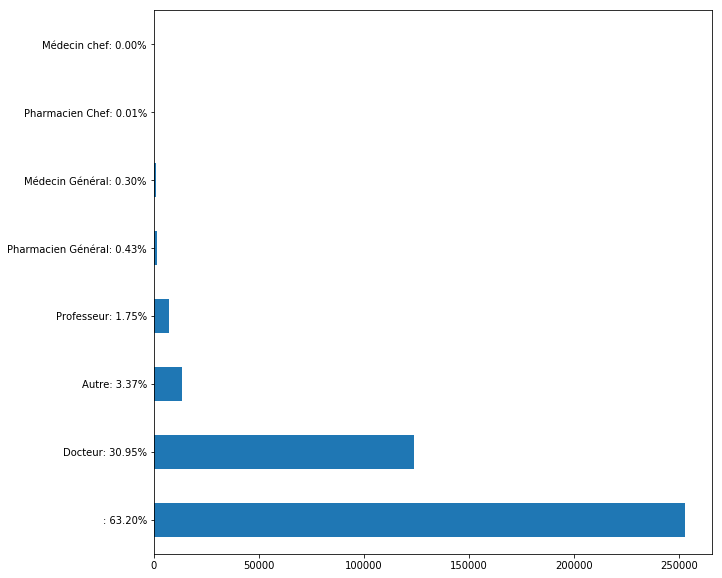

In [11]:
data_count = data_train["benef_titre_libelle"].value_counts()
#Rename index to add percentage
new_index = [k+ ": %.2f%%" %(v*100/N_train) for k,v in data_count.iteritems()]
data_count.index = new_index
fig=plt.figure(figsize= (10,10))
ax = fig.add_subplot(1,1,1)
data_count.plot.barh(logx = False)
plt.show()

In [10]:
def get_num_words_per_sample(sample_texts):  
    
    """Returns the median number of words per sample given corpus.  
    
    # Arguments
      sample_texts: list, sample texts.
  # Returns
  int, median number of words per sample.
  """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

def plot_sample_length_distribution(sample_texts):
    
    plt.hist([len(s.split()) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()
    
def plot_frequency_distribution_of_ngrams(sample_texts, ngram_range=(1, 2),
 num_ngrams=50): 
    kwargs = {'ngram_range': (1, 1),
          'dtype': 'int32',
          'strip_accents': 'unicode',
          'decode_error': 'replace',
          'analyzer': 'word',}  # Split text into word tokens.} 
              
              
              
    vectorizer = CountVectorizer(**kwargs)
              
    vectorized_texts = vectorizer.fit_transform(sample_texts) # This is the list of all n-grams in the index order from the    vocabulary. 
    all_ngrams = list(vectorizer.get_feature_names()) 
    num_ngrams = min(num_ngrams, len(all_ngrams)) # ngrams = all_ngrams[:num_ngrams]
 # Add up the counts per n-gram ie. column-wise 
    all_counts = vectorized_texts.sum(axis=0).tolist()[0] # Sort n-grams and counts by frequency and get top `num_ngrams`   ngrams. 
              
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams] 
              
    fig=plt.figure(figsize= (20,10))
    ax = fig.add_subplot(1,1,1)
    idx = np.arange(num_ngrams)
    plt.bar(idx, counts, width=0.7, color='b')
    plt.xlabel('Chaque mot du libellé du titre du bénéficiaire')
    plt.ylabel('Fréquences')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=45)
    plt.show()

In [68]:
print("Le nombre moyen de mots dans le libellé du titre du bénéficiaire est de : ", get_num_words_per_sample(data_train["benef_titre_libelle"]))

print("En effet, la moyenne est de 0 car il y a beacoup de cases vides (voir graphique en-dessous).")

Le nombre moyen de mots dans le libellé du titre du bénéficiaire est de :  0.0
En effet, la moyenne est de 0 car il y a beacoup de cases vides (voir graphique en-dessous).


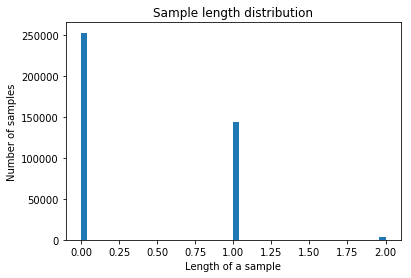

In [33]:
plot_sample_length_distribution(data_train["benef_titre_libelle"])

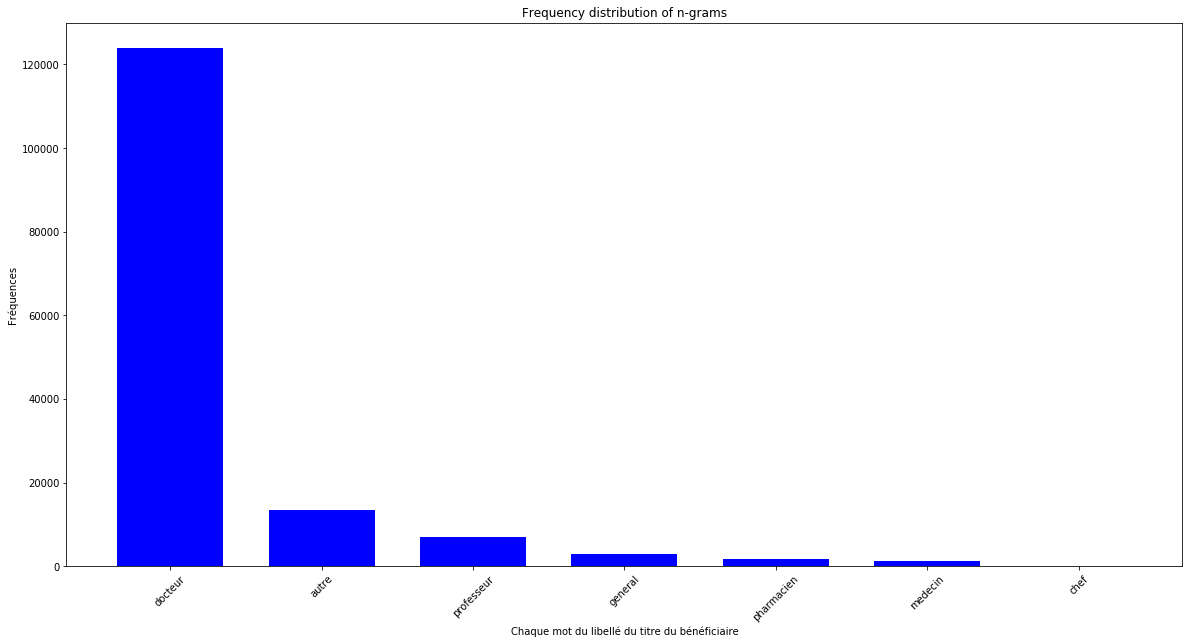

In [70]:
plot_frequency_distribution_of_ngrams(data_train["benef_titre_libelle"])

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from spacy.lang.fr import French

In [35]:
nlp = French()

def spacy_tokenizer(sentence):
  # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)
  
  # Lemmatizing each token and converting each token into lowercase
    mytokens = [word.lemma_.lower() for word in mytokens if
      not word.is_punct and not word.like_num and word.text != 'n']  # Removing stop words
    mytokens = [word for word in mytokens if word not in stop_words]  # Remove accentuated char for any unicode symbol
    mytokens = [strip_accents_ascii(word) for word in mytokens]  # return preprocessed list of tokens
    return mytokens

In [36]:
# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1, 2)# Limit on the number of features. We use the top 20K features.
TOP_K = 20000
# Whether text should be split into word or character n-grams.# One of 'word', 'char'.
TOKEN_MODE = 'word'# Minimum document/corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 2

def ngram_vectorize(train_texts, train_labels, val_texts):

    kwargs = {
         'ngram_range': NGRAM_RANGE,  # Use 1-grams + 2-grams.
         'dtype': 'int32',
         'strip_accents': 'unicode',
         'decode_error': 'replace',
         'analyzer': TOKEN_MODE,  # Split text into word tokens.
         'min_df': MIN_DOCUMENT_FREQUENCY,} 
    
    vectorizer = TfidfVectorizer(**kwargs)  # Learn vocabulary from training texts and vectorize training 
    x_train = vectorizer.fit_transform(train_texts)  # Vectorize validation texts.
    x_val = vectorizer.transform(val_texts)  # Select top 'k' of the vectorized features.
    selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
    selector.fit(x_train, train_labels)
    x_train = selector.transform(x_train).astype('float32')
    x_val = selector.transform(x_val).astype('float32')
    
    return x_train, x_val

## Apprentissage de la qualité en fonction du libellé du titre du bénéficiaire

In [37]:
x_train,x_val = ngram_vectorize(data_train["benef_titre_libelle"], data_train["qualite"], data_valid["benef_titre_libelle"])

y_train = data_train["qualite"]
y_test = data_valid["qualite"]

### Bagging

In [38]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=50, n_jobs=-1)

bag_clf.fit(x_train, y_train)
predicted = bag_clf.predict(x_val)

print("L'accuracy est égal à : ", metrics.accuracy_score(y_test, predicted))

#print("La matrice de confusion : ", metrics.confusion_matrix(y_test, predicted))

print(metrics.classification_report(y_test, predicted))

L'accuracy est égal à :  0.70836
                                                                         precision    recall  f1-score   support

                                                                              0.00      0.00      0.00     10069
                                                          Aide soignant       0.00      0.00      0.00       209
                                                       Audioprothésiste       0.00      0.00      0.00        42
                                             Auxiliaire de puériculture       0.00      0.00      0.00        25
                                                    Chirurgien-dentiste       0.00      0.00      0.00       300
                                                            Diététicien       0.00      0.00      0.00        84
                                                         Ergothérapeute       0.00      0.00      0.00        17
                                                              

L'accuracy nous indique que notre modèle donne environ 71% de bonnes prédictions

On remarque que  pour la qualité "Médecin", le rappel est très bon, ce qui signifie que l'apprentissage a permis de bien attribuer cette qualité en fonction du titre de la spécialité du bénéficiaire.

On remarque également que la précision est élevée pour la qualité "Pharmacien", ce qui signifie que l'apprentissage a permis de bien attribuer la qualité Pharmacien pour les pharmaciens et de ne pas attribuer cette qualité à tort.

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

RandFores_clf = RandomForestClassifier( n_estimators=50, class_weight="balanced", n_jobs=-1)

RandFores_clf.fit(x_train, y_train)
predicted = RandFores_clf.predict(x_val)

print("L'accuracy est égal à : ", metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

L'accuracy est égal à :  0.4118
                                                                         precision    recall  f1-score   support

                                                                              0.16      0.99      0.27     10069
                                                          Aide soignant       0.00      0.00      0.00       209
                                                       Audioprothésiste       0.00      0.00      0.00        42
                                             Auxiliaire de puériculture       0.00      0.00      0.00        25
                                                    Chirurgien-dentiste       0.01      0.06      0.02       300
                                                            Diététicien       0.00      0.00      0.00        84
                                                         Ergothérapeute       0.00      0.65      0.01        17
                                                              I

On remarque que la méthode de Random Forest donne de moins bons résultats que le Bagging.

## Apprentissage du type de l'identifiant en fonction de la catégorie

In [47]:
x_train,x_val = ngram_vectorize(data_train["categorie"], data_train["identifiant_type"], data_valid["categorie"])

y_train = data_train["identifiant_type"]
y_test = data_valid["identifiant_type"]

### Bagging

In [40]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=50, n_jobs=-1)

bag_clf.fit(x_train, y_train)
predicted = bag_clf.predict(x_val)

print("L'accuracy est égal à : ", metrics.accuracy_score(y_test, predicted))

#print("La matrice de confusion : ", metrics.confusion_matrix(y_test, predicted))

print(metrics.classification_report(y_test, predicted))

L'accuracy est égal à :  0.70836
                                                                         precision    recall  f1-score   support

                                                                              0.00      0.00      0.00     10069
                                                          Aide soignant       0.00      0.00      0.00       209
                                                       Audioprothésiste       0.00      0.00      0.00        42
                                             Auxiliaire de puériculture       0.00      0.00      0.00        25
                                                    Chirurgien-dentiste       0.00      0.00      0.00       300
                                                            Diététicien       0.00      0.00      0.00        84
                                                         Ergothérapeute       0.00      0.00      0.00        17
                                                              

### Random Forest

In [50]:
RandFores_clf = RandomForestClassifier( n_estimators=50, class_weight="balanced", n_jobs=-1)

RandFores_clf.fit(x_train, y_train)
predicted = RandFores_clf.predict(x_val)

print("L'accuracy est égal à : ", metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

L'accuracy est égal à :  0.72147
              precision    recall  f1-score   support

       AUTRE       1.00      0.13      0.23     31309
      FINESS       0.17      0.97      0.29       225
       ORDRE       1.00      0.62      0.77      1206
        RPPS       0.74      1.00      0.85     66379
       SIREN       0.19      0.89      0.32       881

   micro avg       0.72      0.72      0.72    100000
   macro avg       0.62      0.72      0.49    100000
weighted avg       0.82      0.72      0.65    100000



***

### <span style="color:blue"> Analyse <span>

In [49]:
# Taille de l'échantillon
conventions_data.shape

(500000, 41)

In [8]:
header_data = conventions_data.columns

In [9]:
conventions_data_sort_by_conv_montant_ttc = conventions_data.sort_values(by = "conv_montant_ttc", ascending = False)

In [10]:
conventions_data_sort_by_conv_montant_ttc

,entreprise_identifiant,denomination_sociale,ligne_identifiant,ligne_rectification,benef_categorie_code,categorie,benef_nom,benef_prenom,benef_qualite_code,qualite,...,conv_date_signature,conv_objet,conv_objet_autre,conv_date_debut,conv_date_fin,conv_montant_ttc,conv_manifestation_date,conv_manifestation_nom,conv_manifestation_lieu,conv_manifestation_organisateur
214360,RIZLLUIF,BRISTOL-MYERS SQUIBB,VNQOAPPCSSSP9,N,[ETA],Etablissement de santÃ©,NaN,NaN,NaN,NaN,...,28/01/2018,Recherche scientifique,NaN,29/01/2018,31/05/2023,13892937.0,NaN,NaN,NaN,NaN
207822,RIZLLUIF,BRISTOL-MYERS SQUIBB,VNQO9OX0CHLQ5,N,[APS],Association professionnel de santÃ©,NaN,NaN,NaN,NaN,...,14/09/2017,Recherche scientifique,NaN,15/09/2017,31/12/2022,6123611.0,NaN,NaN,NaN,NaN
224346,RIZLLUIF,BRISTOL-MYERS SQUIBB,VNQOAB8LMJ1B1,N,[ETA],Etablissement de santÃ©,NaN,NaN,NaN,NaN,...,21/04/2016,Recherche scientifique,NaN,21/04/2016,21/04/2021,4542246.0,NaN,NaN,NaN,NaN
212901,RIZLLUIF,BRISTOL-MYERS SQUIBB,546900CONV,N,[APS],Association professionnel de santÃ©,NaN,NaN,NaN,NaN,...,06/01/2017,"Contrat d'expert scientifique, contrat dans le...",NaN,06/01/2017,NaN,3122915.0,06/01/2017,1-1541107822,NaN,NaN
261869,JUJJFUKK,LABORATOIRE GLAXOSMITHKLINE,MA-RXEU-0000001828-2019,N,[FON],"AcadÃ©mies, Fondation, sociÃ©tÃ©s savantes, or...",NaN,NaN,NaN,NaN,...,19/12/2018,Autres prestations de services,NaN,02/01/2019,01/10/2019,2944482.0,NaN,NaN,NaN,NaN
261870,JUJJFUKK,LABORATOIRE GLAXOSMITHKLINE,MA-RXEU-0000001733-2019,N,[FON],"AcadÃ©mies, Fondation, sociÃ©tÃ©s savantes, or...",NaN,NaN,NaN,NaN,...,07/01/2019,Autres prestations de services,NaN,19/12/2018,30/09/2019,2812196.0,NaN,NaN,NaN,NaN
25499,OURQWXZG,"Biosphere Medical, S.A.",S12018-1,N,[ETA],Etablissement de santÃ©,NaN,NaN,NaN,NaN,...,20/02/2009,Cession de droits / licence d'exploitation,NaN,01/01/2017,31/12/2017,1818729.0,NaN,NaN,NaN,NaN
308121,SOWWIAEU,Bayer HealthCare SAS,C_CAPCD_AH_116,N,[PRE],Presse et mÃ©dia,NaN,NaN,NaN,NaN,...,22/02/2019,Achat / location d'espace publicitaire,SERESTO - Campagne TV,01/04/2019,01/09/2019,1780308.0,NaN,NaN,NaN,NaN
61197,OURQWXZG,"Biosphere Medical, S.A.",S22017-0,N,[ETA],Etablissement de santÃ©,NaN,NaN,NaN,NaN,...,20/02/2009,Cession de droits / licence d'exploitation,NaN,01/01/2016,31/12/2016,1709520.0,NaN,NaN,NaN,NaN
191550,MOMFCMVF,BIOCODEX,2018-S2-7876,N,[FON],"AcadÃ©mies, Fondation, sociÃ©tÃ©s savantes, or...",NaN,NaN,NaN,NaN,...,09/07/2018,Autre,MARKETING,09/07/2018,05/12/2018,844910.0,NaN,NaN,NaN,NaN


### Catégorie

##### Nombre d'occurences par catégorie

In [4]:
conventions_data.ix[:, "categorie"].value_counts()

Professionnel de santé                                                                      449804
Etudiant                                                                                     19888
Association professionnel de santé                                                            6685
Etablissement de santé                                                                        6392
Académies, Fondation, sociétés savantes, organismes de conseils                               5430
Personnes morales assurant la formation initiale ou continue des professionnels de santé      5177
Vétérinaire                                                                                   3738
Presse et média                                                                               2047
Association usager de santé                                                                    542
Vétérinaire Personne Morale                                                                    136
Editeur de

### Dénomination sociale

##### Nombre d'occurences par dénomination sociale

In [145]:
conventions_data.ix[:, "denomination_sociale"].value_counts()

M3 Global Research Ltd                             55238
BOIRON                                             51802
LES LABORATOIRES SERVIER                           26960
JANSSEN-CILAG                                      22226
B3TSI                                              20934
ALK-Abelló                                         16627
UCB Pharma SA                                      15845
LABORATOIRE GLAXOSMITHKLINE                        15406
BIOGEN FRANCE SAS                                  15347
SANOFI AVENTIS FRANCE                              14500
LABORATOIRES MAYOLY SPINDLER                       13288
MSD France                                         10280
DRAPER PHARMA                                      10183
LABORATOIRES URGO                                   9563
A+A                                                 9452
LABORATOIRES ALCON                                  9066
BIOCODEX                                            7573
BVA                            

In [146]:
conventions_data.iloc[:, 1].values

array(['TEVA SANTE SAS', 'LABORATOIRE GLAXOSMITHKLINE', 'BOIRON', ...,
       'JANSSEN-CILAG', 'JANSSEN-CILAG', 'JANSSEN-CILAG'], dtype=object)

In [147]:
conventions_data.iloc[:, 1:2].describe()

,denomination_sociale
count,500000
unique,880
top,M3 Global Research Ltd
freq,55238


On remarque que la dénomination sociale revenant le plus de fois est "M3 Global Research Ltd"

##### Mots revenant le plus de fois (dénomination sociale)

In [148]:
conventions_data.loc[:, 'denomination_sociale']

0                       TEVA SANTE SAS
1          LABORATOIRE GLAXOSMITHKLINE
2                               BOIRON
3         LABORATOIRES MAYOLY SPINDLER
4         LABORATOIRES MAYOLY SPINDLER
5          LABORATOIRE GLAXOSMITHKLINE
6             LES LABORATOIRES SERVIER
7             LES LABORATOIRES SERVIER
8         LABORATOIRES MAYOLY SPINDLER
9         LABORATOIRES MAYOLY SPINDLER
10        LABORATOIRES MAYOLY SPINDLER
11            LES LABORATOIRES SERVIER
12            LES LABORATOIRES SERVIER
13                       JANSSEN-CILAG
14                          MSD France
15                       JANSSEN-CILAG
16            LES LABORATOIRES SERVIER
17           Incyte Biosciences France
18           Incyte Biosciences France
19                      TEVA SANTE SAS
20        LABORATOIRES MAYOLY SPINDLER
21                      TEVA SANTE SAS
22            LES LABORATOIRES SERVIER
23                       JANSSEN-CILAG
24                       JANSSEN-CILAG
25            LES LABORAT

In [152]:
from sklearn.feature_extraction.text import CountVectorizer
CV_denomination_sociale_convention = CountVectorizer(max_features=300)
CV_denomination_sociale_convention.fit(conventions_data.loc[:, 'denomination_sociale'].values)
bag_of_words_denomination_sociale_convention = CV_denomination_sociale_convention.transform(conventions_data.loc[:, 'denomination_sociale'].values)

In [153]:
# Tous les mots existants
CV_denomination_sociale_convention.vocabulary_

{'teva': 273,
 'sante': 245,
 'sas': 249,
 'laboratoire': 159,
 'glaxosmithkline': 121,
 'boiron': 48,
 'laboratoires': 160,
 'mayoly': 175,
 'spindler': 261,
 'les': 162,
 'servier': 253,
 'janssen': 151,
 'cilag': 60,
 'msd': 189,
 'france': 110,
 'incyte': 139,
 'biosciences': 43,
 'grünenthal': 128,
 'csl': 75,
 'behring': 33,
 'sa': 242,
 'europe': 97,
 'bracco': 50,
 'imaging': 136,
 'smith': 256,
 'nephew': 195,
 'pfizer': 223,
 'biogen': 39,
 'lilly': 165,
 'biocodex': 37,
 'astrazeneca': 27,
 'lundbeck': 170,
 'boehringer': 47,
 'ingelheim': 142,
 'medical': 177,
 'sarl': 248,
 'elia': 92,
 'paris': 217,
 'ouest': 212,
 'tornier': 278,
 'allergan': 19,
 'bard': 31,
 'bayer': 32,
 'healthcare': 132,
 'parexel': 216,
 'international': 146,
 'neurelec': 197,
 'sandoz': 243,
 'ldr': 161,
 'médical': 193,
 'chiesi': 59,
 'nigy': 198,
 'johnson': 152,
 'live': 167,
 'by': 53,
 'gl': 120,
 'events': 100,
 'mundipharma': 190,
 'b3tsi': 30,
 'stallergenes': 264,
 'menarini': 181,
 'ots

In [154]:
# Tous les mots existants
CV_denomination_sociale_convention.get_feature_names()

['3m',
 '42',
 'abbott',
 'abbvie',
 'abelló',
 'abmedica',
 'actions',
 'active',
 'adep',
 'adept',
 'adliva',
 'advanced',
 'ag',
 'agir',
 'aguettant',
 'air',
 'alcon',
 'alk',
 'all',
 'allergan',
 'amgen',
 'amo',
 'arthrex',
 'aspen',
 'assistance',
 'associes',
 'astellas',
 'astrazeneca',
 'audilab',
 'aventis',
 'b3tsi',
 'bard',
 'bayer',
 'behring',
 'benckiser',
 'benefit',
 'bio',
 'biocodex',
 'biogaran',
 'biogen',
 'biomedicaments',
 'bionics',
 'bioprotec',
 'biosciences',
 'biosensors',
 'biotronik',
 'biovitrum',
 'boehringer',
 'boiron',
 'bouchara',
 'bracco',
 'bristol',
 'bva',
 'by',
 'caraibes',
 'care',
 'carl',
 'celgene',
 'centre',
 'chiesi',
 'cilag',
 'clinical',
 'clinique',
 'colloques',
 'coloplast',
 'congres',
 'consumed',
 'convatec',
 'conventions',
 'cooperative',
 'cordis',
 'corin',
 'correvio',
 'cosmetique',
 'covidien',
 'csl',
 'de',
 'densmore',
 'dental',
 'dentsply',
 'depuy',
 'des',
 'developpement',
 'diabetes',
 'diagnostica',
 'dia

In [155]:
sum_words_denomination_sociale_convention = bag_of_words_denomination_sociale_convention.sum(axis=0) 
words_freq_denomination_sociale_convention = [(word_denomination_sociale_convention, sum_words_denomination_sociale_convention[0, idx_denomination_sociale_convention]) for word_denomination_sociale_convention, idx_denomination_sociale_convention in CV_denomination_sociale_convention.vocabulary_.items()]

Mots revenant le plus de fois dans la dénomination sociale :

In [156]:
sorted(words_freq_denomination_sociale_convention, key = lambda x: x[1], reverse = True)

[('france', 88483),
 ('laboratoires', 64663),
 ('global', 58417),
 ('research', 57524),
 ('ltd', 55402),
 ('m3', 55238),
 ('boiron', 52819),
 ('sas', 49468),
 ('pharma', 33548),
 ('les', 26964),
 ('servier', 26960),
 ('janssen', 22226),
 ('cilag', 22226),
 ('b3tsi', 20934),
 ('sa', 19954),
 ('alk', 16627),
 ('abelló', 16627),
 ('laboratoire', 16623),
 ('ucb', 15845),
 ('glaxosmithkline', 15578),
 ('biogen', 15347),
 ('sanofi', 14830),
 ('aventis', 14786),
 ('mayoly', 13288),
 ('spindler', 13288),
 ('msd', 10598),
 ('draper', 10183),
 ('urgo', 9563),
 ('alcon', 9066),
 ('medical', 8451),
 ('biocodex', 7573),
 ('pfizer', 7197),
 ('iqvia', 6775),
 ('bva', 6638),
 ('radar', 6383),
 ('astrazeneca', 6049),
 ('pfe', 6022),
 ('aspen', 5616),
 ('boehringer', 5534),
 ('ingelheim', 5534),
 ('ethicon', 5154),
 ('novo', 4948),
 ('nordisk', 4948),
 ('sante', 4863),
 ('stallergenes', 4567),
 ('teva', 4005),
 ('pascaleo', 3895),
 ('pharmaceutical', 3754),
 ('otsuka', 3752),
 ('merial', 3700),
 ('group

On remarque que les mots revenant le plus souvent dans la dénomination sociale sont : france, laboratoires et global.

### Qualité

##### Nombre d'occurences par qualité

In [157]:
conventions_data.ix[:, "qualite"].value_counts()

Médecin                                                                    346348
Pharmacien                                                                  40640
Infirmier                                                                   27184
Préparateur en pharmacie et préparateur en pharmacie hospitalière           24559
Sage-femme                                                                   4285
Opticien-lunetier                                                            1991
Chirurgien-dentiste                                                          1327
Aide soignant                                                                 944
Masseur-kinésithérapeute                                                      628
Manipulateur d’électroradiologie médicale                                     569
Diététicien                                                                   426
Orthoptiste                                                                   348
Technicien de la

### Ville du bénéficiaire

##### Nombre d'occurences par ville du bénéficiaire

In [158]:
conventions_data.ix[:, "benef_ville"].value_counts()

PARIS                            19690
MARSEILLE                         7406
TOULOUSE                          4471
LYON                              4400
NICE                              4016
MONTPELLIER                       3729
STRASBOURG                        3523
NANTES                            3347
BORDEAUX                          3138
LILLE                             3039
LILLE CEDEX                       2574
RENNES                            2490
TOULOUSE CEDEX 9                  2334
Paris                             2223
BORDEAUX CEDEX                    2142
MONTPELLIER CEDEX 5               2132
DIJON                             2033
TOULON                            1750
ROUEN                             1742
LIMOGES                           1687
ANGERS                            1620
REIMS                             1613
NIMES                             1528
PARIS CEDEX 13                    1515
ROUEN CEDEX                       1498
TOURS                    

### Pays du bénéficiaire

##### Nombre d'occurences par pays du bénéficiaire

In [159]:
conventions_data.ix[:, "pays"].value_counts()

FRANCE                            478512
MARTINIQUE                           545
RÉUNION                              457
GUADELOUPE                           456
GUYANE FRANÇAISE                     286
ÉTATS-UNIS                           180
SUISSE                                32
ROYAUME-UNI                           32
MONACO                                30
MAYOTTE                               26
NOUVELLE-CALÉDONIE                    23
GUYANA                                14
BELGIQUE                              13
POLYNÉSIE FRANÇAISE                   10
ALLEMAGNE                              8
LUXEMBOURG                             3
CANADA                                 2
AUTRICHE                               2
SAINT-MARTIN(PARTIE FRANÇAISE)         2
SUÈDE                                  2
ESPAGNE                                2
ARABIE SAOUDITE                        1
ITALIE                                 1
SAO TOMÉ-ET-PRINCIPE                   1
DANEMARK        

### Libellé du titre du bénéficiaire

##### Nombre d'occurences par le libellé du titre du bénéficiaire

In [160]:
conventions_data.ix[:, "benef_titre_libelle"].value_counts()

Docteur               154669
Autre                  16860
Professeur              8781
Pharmacien Général      2113
Médecin Général         1506
Pharmacien Chef           55
Médecin chef              16
Name: benef_titre_libelle, dtype: int64

### Spécialité du titre du bénéficiaire

##### Nombre d'occurences par la spécialité du titre du bénéficiaire

In [161]:
conventions_data.ix[:, "benef_speicalite_libelle"].value_counts()

Médecine Générale                                      51291
Autre                                                  42474
Neurologie                                             16645
Cardiologie et maladies vasculaires                    11452
Psychiatrie                                            11100
Ophtalmologie                                           9752
Pneumologie                                             8884
Rhumatologie                                            8720
Pédiatrie                                               6805
Gastro-entérologie et hépatologie                       5294
Endocrinologie et métabolisme                           4805
Chirurgie orthopédique et traumatologie                 3903
Hématologie                                             3770
Dermatologie et vénéréologie                            3677
Oncologie option médicale                               3082
Anesthesie-réanimation                                  3031
Médecine interne        

##### Mots revenant le plus de fois (spécialité du titre du bénéficiaire)

In [162]:
conventions_data_specialite = conventions_data.loc[:, 'benef_speicalite_libelle'][conventions_data.loc[:, 'benef_speicalite_libelle'].notna()]

In [163]:
CV_specialite_convention = CountVectorizer(max_features=300)
CV_specialite_convention.fit(conventions_data_specialite.values)
bag_of_words_specialite_convention  = CV_specialite_convention.transform(conventions_data_specialite.values)

In [164]:
# Tous les mots existants
CV_specialite_convention.vocabulary_

{'médecine': 40,
 'générale': 27,
 'cardiologie': 7,
 'et': 22,
 'maladies': 38,
 'vasculaires': 86,
 'autre': 3,
 'psychiatrie': 63,
 'hématologie': 31,
 'pneumologie': 62,
 'gastro': 24,
 'entérologie': 20,
 'hépatologie': 33,
 'neurologie': 44,
 'interne': 35,
 'oncologie': 49,
 'option': 51,
 'médicale': 41,
 'néphrologie': 46,
 'chirurgie': 9,
 'pédiatrie': 65,
 'rhumatologie': 72,
 'orthopédique': 55,
 'traumatologie': 82,
 'spécialiste': 78,
 'en': 17,
 'biologie': 4,
 'anesthesie': 2,
 'réanimation': 74,
 'endocrinologie': 18,
 'métabolisme': 42,
 'qualifié': 66,
 'vasculaire': 85,
 'gériatrie': 29,
 'radio': 67,
 'diagnostic': 14,
 'gynécologie': 26,
 'cervico': 8,
 'faciale': 23,
 'obstétrique': 47,
 'maladie': 37,
 'du': 16,
 'sang': 75,
 'oto': 56,
 'rhino': 71,
 'laryngologie': 36,
 'enfant': 19,
 'adolescent': 0,
 'ophtalmologie': 50,
 'travail': 83,
 'thérapie': 81,
 'dermatologie': 13,
 'vénéréologie': 88,
 'gynéco': 25,
 'urologique': 84,
 'recherche': 69,
 'neuro': 43

In [165]:
# Tous les mots existants
CV_specialite_convention.get_feature_names()

['adolescent',
 'anatomie',
 'anesthesie',
 'autre',
 'biologie',
 'bucco',
 'cardio',
 'cardiologie',
 'cervico',
 'chirurgie',
 'cytologie',
 'dentaire',
 'dento',
 'dermatologie',
 'diagnostic',
 'digestive',
 'du',
 'en',
 'endocrinologie',
 'enfant',
 'entérologie',
 'esthétique',
 'et',
 'faciale',
 'gastro',
 'gynéco',
 'gynécologie',
 'générale',
 'génétique',
 'gériatrie',
 'hygiène',
 'hématologie',
 'hémovigilance',
 'hépatologie',
 'infantile',
 'interne',
 'laryngologie',
 'maladie',
 'maladies',
 'maxillo',
 'médecine',
 'médicale',
 'métabolisme',
 'neuro',
 'neurologie',
 'nucléaire',
 'néphrologie',
 'obstétrique',
 'onco',
 'oncologie',
 'ophtalmologie',
 'option',
 'orale',
 'orl',
 'orthopédie',
 'orthopédique',
 'oto',
 'pathologiques',
 'pharmacie',
 'pharmacovigilance',
 'physique',
 'plastique',
 'pneumologie',
 'psychiatrie',
 'publique',
 'pédiatrie',
 'qualifié',
 'radio',
 'radiothérapie',
 'recherche',
 'reconstructrice',
 'rhino',
 'rhumatologie',
 'réadap

In [166]:
sum_words_specialite_convention = bag_of_words_specialite_convention.sum(axis=0) 
words_freq_specialite_convention = [(word_specialite_convention, sum_words_specialite_convention[0, idx_specialite_convention]) for word_specialite_convention, idx_specialite_convention in CV_specialite_convention.vocabulary_.items()]

In [167]:
sorted(words_freq_specialite_convention, key = lambda x: x[1], reverse = True)

[('médecine', 58743),
 ('générale', 55301),
 ('autre', 42474),
 ('et', 34002),
 ('neurologie', 16645),
 ('chirurgie', 11750),
 ('cardiologie', 11452),
 ('maladies', 11452),
 ('vasculaires', 11452),
 ('psychiatrie', 11225),
 ('ophtalmologie', 9881),
 ('pneumologie', 8884),
 ('rhumatologie', 8720),
 ('médicale', 7216),
 ('pédiatrie', 6805),
 ('gastro', 5294),
 ('entérologie', 5294),
 ('hépatologie', 5294),
 ('endocrinologie', 4805),
 ('métabolisme', 4805),
 ('hématologie', 4525),
 ('option', 4073),
 ('orthopédique', 3903),
 ('traumatologie', 3903),
 ('oncologie', 3735),
 ('dermatologie', 3677),
 ('vénéréologie', 3677),
 ('gynécologie', 3451),
 ('réanimation', 3413),
 ('anesthesie', 3031),
 ('en', 2960),
 ('interne', 2825),
 ('radio', 2479),
 ('viscérale', 1975),
 ('digestive', 1975),
 ('oto', 1921),
 ('rhino', 1921),
 ('laryngologie', 1921),
 ('urologique', 1741),
 ('qualifié', 1578),
 ('diagnostic', 1545),
 ('spécialiste', 1382),
 ('biologie', 1188),
 ('vasculaire', 1102),
 ('obstétriqu

On remarque que les mots pertinents revenant le plus souvent dans la spécialité du titre du bénéficiaire sont : médecine, neurologie, chirurgie et cardiologie.

### Objet de la convention

##### Nombre d'occurences par l'objet de la convention

In [168]:
conventions_data.ix[:, "conv_objet"].value_counts()

Autre                                                                                          205125
Hospitalité                                                                                    122842
Enquête / Etude / Etude de marché (hors recherche)                                              76036
Formation                                                                                       42908
Contrat d'intervenant à une manifestation / orateur                                              8858
Contrat d'expert scientifique, contrat dans le cadre d'une recherche, contrat de consultant      8263
Inscription congrès                                                                              7987
Achat / location d'espace publicitaire                                                           6794
Recherche scientifique                                                                           6505
Autres prestations de services                                                    

##### Mots revenant le plus de fois (objet de la convention)

In [169]:
CV_objet_convention = CountVectorizer(max_features=300)
CV_objet_convention.fit(conventions_data.loc[:, 'conv_objet'].values)
bag_of_words_objet_convention = CV_objet_convention.transform(conventions_data.loc[:, 'conv_objet'].values)

In [170]:
# Tous les mots existants
CV_objet_convention.vocabulary_

{'autre': 1,
 'hospitalité': 26,
 'formation': 24,
 'contrat': 8,
 'expert': 21,
 'scientifique': 48,
 'dans': 10,
 'le': 30,
 'cadre': 4,
 'une': 51,
 'recherche': 46,
 'de': 11,
 'consultant': 7,
 'inscription': 27,
 'congrès': 6,
 'intervenant': 28,
 'manifestation': 33,
 'orateur': 37,
 'achat': 0,
 'location': 32,
 'espaces': 18,
 'événements': 53,
 'scientifiques': 49,
 'expertise': 22,
 'que': 45,
 'edition': 15,
 'partenariat': 39,
 'espace': 17,
 'publicitaire': 44,
 'autres': 2,
 'prestations': 40,
 'services': 50,
 'parrainage': 38,
 'documentation': 12,
 'don': 13,
 'mécénat': 36,
 'remise': 47,
 'bourse': 3,
 'enquête': 16,
 'etude': 19,
 'marché': 34,
 'hors': 25,
 'cession': 5,
 'droits': 14,
 'licence': 31,
 'exploitation': 23,
 'evaluation': 20,
 'produit': 42,
 'cosmétique': 9,
 'interview': 29,
 'prix': 41,
 'prêt': 43,
 'matériel': 35,
 'vigilance': 52}

In [171]:
# Tous les mots existants
CV_objet_convention.get_feature_names()

['achat',
 'autre',
 'autres',
 'bourse',
 'cadre',
 'cession',
 'congrès',
 'consultant',
 'contrat',
 'cosmétique',
 'dans',
 'de',
 'documentation',
 'don',
 'droits',
 'edition',
 'enquête',
 'espace',
 'espaces',
 'etude',
 'evaluation',
 'expert',
 'expertise',
 'exploitation',
 'formation',
 'hors',
 'hospitalité',
 'inscription',
 'intervenant',
 'interview',
 'le',
 'licence',
 'location',
 'manifestation',
 'marché',
 'matériel',
 'mécénat',
 'orateur',
 'parrainage',
 'partenariat',
 'prestations',
 'prix',
 'produit',
 'prêt',
 'publicitaire',
 'que',
 'recherche',
 'remise',
 'scientifique',
 'scientifiques',
 'services',
 'une',
 'vigilance',
 'événements']

In [172]:
sum_words_objet_convention = bag_of_words_objet_convention.sum(axis=0) 
words_freq_objet_convention = [(word_objet_convention, sum_words_objet_convention[0, idx_objet_convention]) for word_objet_convention, idx_objet_convention in CV_objet_convention.vocabulary_.items()]

In [173]:
sorted(words_freq_objet_convention, key = lambda x: x[1], reverse = True)

[('autre', 205796),
 ('etude', 152072),
 ('hospitalité', 122842),
 ('recherche', 90804),
 ('de', 90249),
 ('enquête', 76036),
 ('marché', 76036),
 ('hors', 76036),
 ('formation', 42908),
 ('contrat', 34407),
 ('une', 17171),
 ('scientifique', 15467),
 ('dans', 11457),
 ('le', 11457),
 ('cadre', 11457),
 ('achat', 10016),
 ('location', 9988),
 ('intervenant', 8858),
 ('manifestation', 8858),
 ('orateur', 8858),
 ('expert', 8263),
 ('consultant', 8263),
 ('inscription', 7987),
 ('congrès', 7987),
 ('espace', 6794),
 ('publicitaire', 6794),
 ('autres', 5718),
 ('prestations', 5718),
 ('services', 5718),
 ('espaces', 3194),
 ('événements', 3194),
 ('scientifiques', 3194),
 ('don', 2344),
 ('mécénat', 2344),
 ('partenariat', 1163),
 ('expertise', 671),
 ('que', 671),
 ('edition', 570),
 ('parrainage', 342),
 ('produit', 309),
 ('cosmétique', 309),
 ('evaluation', 307),
 ('prêt', 101),
 ('matériel', 101),
 ('cession', 92),
 ('droits', 92),
 ('licence', 92),
 ('exploitation', 92),
 ('intervie

On remarque que les mots pertinents revenant le plus souvent dans l'objet de la convention sont : étude, hospitalité et recherche.

### Montant TTC de la convention

##### Nombre d'occurences par le montant TTC de la convention

In [175]:
conventions_data.ix[:, "conv_montant_ttc"].value_counts()

0.0         7565
60.0        6404
50.0        1833
25.0        1169
150.0       1133
55.0        1111
57.0         991
40.0         855
30.0         842
500.0        749
20.0         683
45.0         643
35.0         628
1000.0       620
22.0         579
70.0         571
90.0         554
24.0         546
23.0         522
300.0        513
58.0         477
110.0        471
1500.0       467
85.0         449
2.0          438
21.0         429
75.0         426
18.0         384
19.0         382
15.0         341
            ... 
12363.0        1
1545.0         1
98851.0        1
24705.0        1
6175.0         1
3256.0         1
48224.0        1
6203.0         1
4720.0         1
12478.0        1
24900.0        1
27500.0        1
6238.0         1
1784.0         1
1559.0         1
11900.0        1
24918.0        1
6228.0         1
1412.0         1
49788.0        1
24831.0        1
5872.0         1
21720.0        1
128768.0       1
1555.0         1
381.0          1
3108.0         1
2108.0        

### Nom de la convention

##### Nombre d'occurences par le nom de la convention

In [178]:
conventions_data.ix[:, "conv_manifestation_nom"].value_counts()

LE MICROBIOTE INTESTINAL                                                                                             2746
EPU                                                                                                                  1778
Actualités en cardiologie                                                                                            1759
L'alliance efficacité/protection : un impératif                                                                       928
Gamme GSK BPCO                                                                                                        863
ANXIETE LEGERE                                                                                                        832
Déclaration simplifiée – Convention 2017/01 CNOM/LEEM - anesthésie réanimation                                        812
Rencontres Pluridisciplinaires - Parcours de Soins                                                                    809
Réunion d'informations  

##### Mots revenant le plus de fois (nom de la convention)

In [181]:
conventions_data_nom_convention = conventions_data.loc[:, 'conv_manifestation_nom'][conventions_data.loc[:, 'conv_manifestation_nom'].notna()]

In [185]:
CV_nom_convention = CountVectorizer(max_features=300)
CV_nom_convention.fit(conventions_data_nom_convention.values)
bag_of_words_nom_convention = CV_nom_convention.transform(conventions_data_nom_convention.values)

In [186]:
# Tous les mots existants
CV_nom_convention.vocabulary_

{'rps': 242,
 '2018': 23,
 'du': 102,
 '12': 9,
 '18': 15,
 'actualités': 29,
 'en': 109,
 'cardiologie': 60,
 'rp': 241,
 'tr': 275,
 'une': 280,
 'consultation': 85,
 'virtuelle': 290,
 'avec': 48,
 'votre': 294,
 'patient': 206,
 'diabétique': 97,
 'de': 92,
 'type': 278,
 'janssen': 160,
 'psychiatrie': 225,
 'pratique': 215,
 '2016': 21,
 'breaking': 55,
 'news': 190,
 'actualité': 28,
 'hta': 143,
 'et': 115,
 'diabète': 96,
 '2017': 22,
 'congrès': 83,
 'symposium': 266,
 'les': 171,
 'apa': 36,
 'american': 31,
 'association': 39,
 'meeting': 180,
 'la': 167,
 'table': 268,
 'ronde': 239,
 'post': 212,
 'rfi': 235,
 'quand': 226,
 'psy': 224,
 'expérience': 121,
 'clinique': 70,
 'dans': 89,
 'prise': 219,
 'charge': 65,
 'vos': 293,
 'patients': 207,
 'rencontres': 233,
 'hypertension': 144,
 'risque': 238,
 'relvar': 231,
 '04': 3,
 'ou': 199,
 '11': 8,
 '16': 13,
 'staff': 261,
 'gastro': 133,
 '19': 16,
 'mg': 181,
 'dépression': 104,
 'impact': 146,
 'sur': 265,
 'au': 44,

In [187]:
# Tous les mots existants
CV_nom_convention.get_feature_names()

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1er',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '25',
 'actualite',
 'actualites',
 'actualité',
 'actualités',
 'alliance',
 'american',
 'anesthésie',
 'anhédonie',
 'anoro',
 'anxiete',
 'apa',
 'apmg',
 'arthrose',
 'association',
 'asthme',
 'atelier',
 'ateliers',
 'atteints',
 'au',
 'autour',
 'avancees',
 'avc',
 'avec',
 'biosimilaire',
 'biosimilaires',
 'board',
 'bon',
 'bordeaux',
 'bpco',
 'breaking',
 'bu',
 'ca',
 'cancer',
 'cardiaque',
 'cardiologie',
 'cas',
 'centre',
 'cfa',
 'ch',
 'charge',
 'chez',
 'chirurgie',
 'chroniques',
 'chu',
 'clinique',
 'cliniques',
 'club',
 'cnom',
 'cns',
 'coeur',
 'colloque',
 'comme',
 'comment',
 'comprendre',
 'conférence',
 'congres',
 'congress',
 'congrès',
 'connaître',
 'consultation',
 'contrôle',
 'convention',
 'cours',
 'dans',
 'date',
 'day',
 'de',
 'dermatologie',
 'des',

In [188]:
sum_words_nom_convention = bag_of_words_nom_convention.sum(axis=0) 
words_freq_nom_convention = [(word_nom_convention, sum_words_nom_convention[0, idx_nom_convention]) for word_nom_convention, idx_nom_convention in CV_nom_convention.vocabulary_.items()]

In [189]:
sorted(words_freq_nom_convention, key = lambda x: x[1], reverse = True)

[('de', 56507),
 ('la', 37710),
 ('en', 35883),
 ('et', 26144),
 ('le', 17365),
 ('du', 16899),
 ('des', 14741),
 ('prise', 14203),
 ('charge', 13958),
 ('les', 11442),
 ('rp', 10177),
 ('dans', 10167),
 ('staff', 9704),
 ('2018', 8644),
 ('2017', 7786),
 ('sur', 7498),
 ('2016', 6290),
 ('au', 5809),
 ('patients', 5766),
 ('rencontres', 5712),
 ('2014', 5629),
 ('congres', 5575),
 ('patient', 5427),
 ('post', 4686),
 ('2015', 4597),
 ('actualités', 4472),
 ('un', 4442),
 ('epu', 4327),
 ('reunion', 4306),
 ('formation', 4304),
 ('vl', 4195),
 ('pour', 4130),
 ('réunion', 3857),
 ('bpco', 3801),
 ('rps', 3702),
 ('actualites', 3584),
 ('microbiote', 3544),
 ('pratiques', 3518),
 ('psychiatrie', 3468),
 ('clinique', 3334),
 ('traitement', 3220),
 ('partage', 3207),
 ('intestinal', 3174),
 ('simplifiée', 3056),
 ('chirurgie', 2864),
 ('sep', 2806),
 ('pratique', 2786),
 ('dépression', 2786),
 ('cardiologie', 2629),
 ('2013', 2593),
 ('déclaration', 2412),
 ('01', 2374),
 ('symposium', 23

### Lieu de la convention

##### Nombre d'occurences par le lieu de la convention

In [176]:
conventions_data.ix[:, "conv_manifestation_lieu"].value_counts()

PARIS                                                                                16201
France                                                                                5770
MARSEILLE                                                                             3165
LYON                                                                                  2721
BORDEAUX                                                                              2304
NICE                                                                                  1874
TOULOUSE                                                                              1842
0                                                                                     1655
PARIS / FRANCE                                                                        1602
Paris                                                                                 1581
LILLE                                                                                 1534

### Organisateur de la convention

##### Nombre d'occurences par l'organisateur de la convention

In [177]:
conventions_data.ix[:, "conv_manifestation_organisateur"].value_counts()

JANSSEN                                                                                                        16516
MSD FRANCE                                                                                                      5458
UCB Pharma SA                                                                                                   3762
BIOCODEX                                                                                                        3340
UCB                                                                                                             3294
MSD-FRANCE                                                                                                      3083
OTSUKA                                                                                                          2844
STALLERGENES                                                                                                    1411
BAYER                                                           

---

## <span style="color:red"> Analyse du jeu de données rémunérations <span>

### <span style="color:blue"> Natural Language Processing <span>

In [17]:
remunerations_data_all = remunerations_data.fillna("") 
remunerations_data_train, remunerations_data_valid = sms.train_test_split(remunerations_data_all, test_size = 0.2,random_state=47)

remunerations_data_train.reset_index(inplace = True)
remunerations_data_valid.reset_index(inplace = True)

N_remunerations_train = remunerations_data_train.shape[0]
N_remunerations_valid = remunerations_data_valid.shape[0]

print("Nombre de données d'entraînement : %d éléments, Nombre de données de validation : %d éléments" %  (N_remunerations_train, N_remunerations_valid))

Nombre de données d'entraînement : 491444 éléments, Nombre de données de validation : 122862 éléments


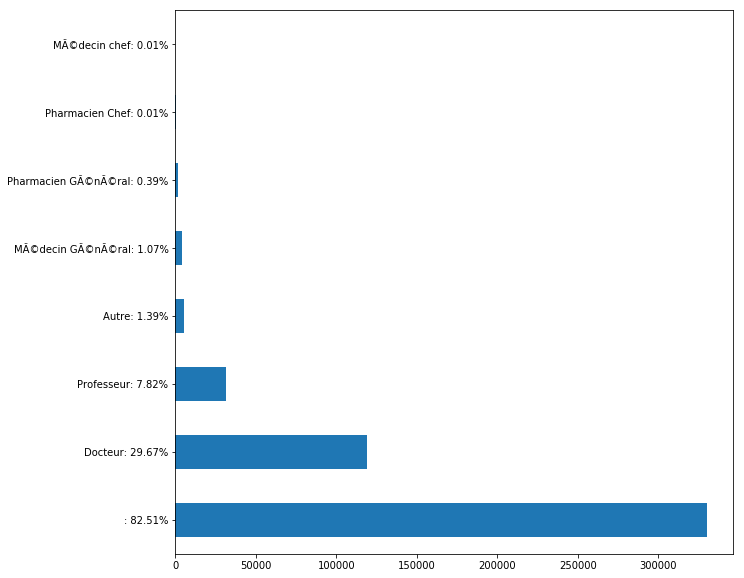

In [23]:
data_remunerations_count = remunerations_data_train["benef_titre_libelle"].value_counts()
#Rename index to add percentage
new_index = [k+ ": %.2f%%" %(v*100/N_train) for k,v in data_remunerations_count.iteritems()]
data_remunerations_count.index = new_index
figure = plt.figure(figsize= (10,10))
ax = figure.add_subplot(1,1,1)
data_remunerations_count.plot.barh(logx = False)
plt.show()

In [25]:
print("Le nombre moyen de mots dans le libellé du titre du bénéficiaire est de : ", get_num_words_per_sample(remunerations_data_train["benef_titre_libelle"]))

print("En effet, la moyenne est de 0 car il y a beacoup de cases vides (voir graphique en-dessous).")

Le nombre moyen de mots dans le libellé du titre du bénéficiaire est de :  0.0
En effet, la moyenne est de 0 car il y a beacoup de cases vides (voir graphique en-dessous).


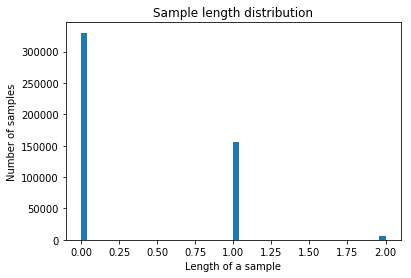

In [26]:
plot_sample_length_distribution(remunerations_data_train["benef_titre_libelle"])

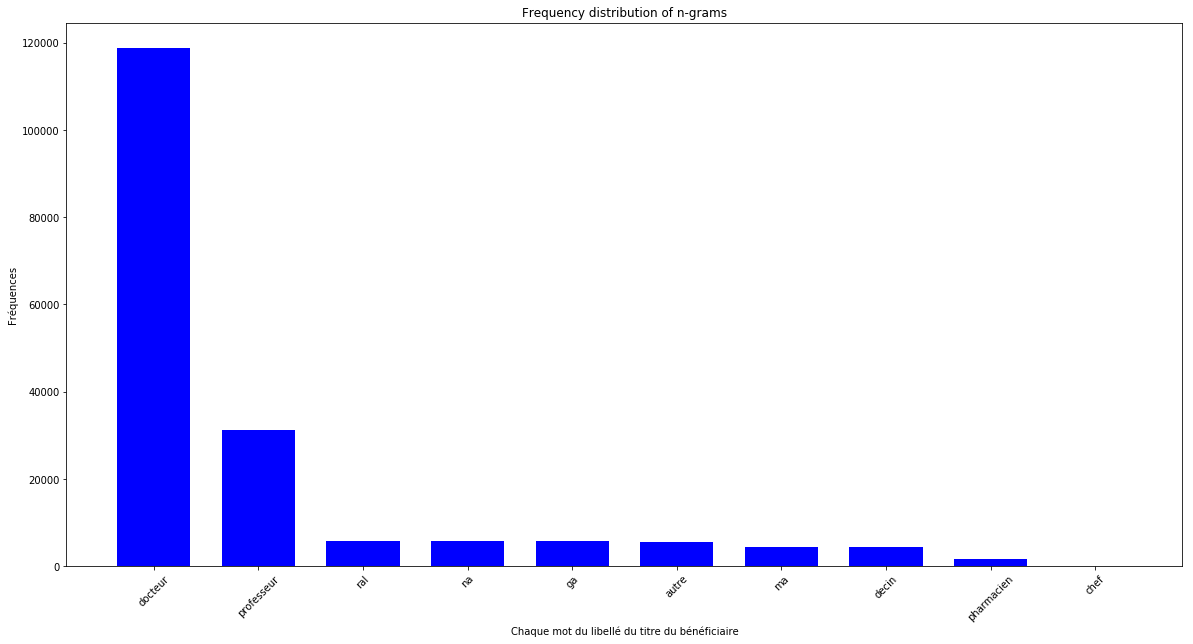

In [27]:
plot_frequency_distribution_of_ngrams(remunerations_data_train["benef_titre_libelle"])

## Apprentissage de la qualité en fonction du libellé du titre du bénéficiaire

In [46]:
x_train_remunerations, x_val_remunerations = ngram_vectorize(remunerations_data_train["benef_titre_libelle"], remunerations_data_train["qualite"], remunerations_data_valid["benef_titre_libelle"])

y_train_remunerations = remunerations_data_train["qualite"]
y_test_remunerations = remunerations_data_valid["qualite"]

### Bagging

In [51]:
bag_clf.fit(x_train_remunerations, y_train_remunerations)
predicted_bagg_remunerations = bag_clf.predict(x_val_remunerations)

print("L'accuracy est égal à : ", metrics.accuracy_score(y_test_remunerations, predicted_bagg_remunerations))

print(metrics.classification_report(y_test_remunerations, predicted_bagg_remunerations))

L'accuracy est égal à :  0.6536520649183637
                                                                              precision    recall  f1-score   support

                                                                                   0.50      1.00      0.67     41644
                                                               Aide soignant       0.00      0.00      0.00        16
                                                                 Ambulancier       0.00      0.00      0.00         2
                                                          Assistant dentaire       0.00      0.00      0.00         1
                                                 Auxiliaire de puÃ©riculture       0.00      0.00      0.00         3
                                                         Chirurgien-dentiste       0.00      0.00      0.00       375
                                                               DiÃ©tÃ©ticien       0.00      0.00      0.00        73
           

L'accuracy nous indique que notre modèle donne environ 65% de bonnes prédictions

### Random Forest

In [54]:
RandFores_clf.fit(x_train_remunerations, y_train_remunerations)
predicted_rf_remunerations = RandFores_clf.predict(x_val_remunerations)

print("L'accuracy est égal à : ", metrics.accuracy_score(y_test_remunerations, predicted_rf_remunerations))
print(metrics.classification_report(y_test_remunerations, predicted_rf_remunerations))

L'accuracy est égal à :  0.4139766567368267
                                                                              precision    recall  f1-score   support

                                                                                   0.50      1.00      0.67     41644
                                                               Aide soignant       0.00      0.00      0.00        16
                                                                 Ambulancier       0.00      0.00      0.00         2
                                                          Assistant dentaire       0.00      0.00      0.00         1
                                                 Auxiliaire de puÃ©riculture       0.00      0.67      0.00         3
                                                         Chirurgien-dentiste       0.01      0.56      0.01       375
                                                               DiÃ©tÃ©ticien       0.00      0.00      0.00        73
           

L'accuracy nous indique que notre modèle donne environ 41% de bonnes prédictions.

Le Random Forest donne de moins bons résultats que le Bagging.

## Apprentissage du type de l'identifiant en fonction de la catégorie

In [56]:
x_train_remunerations, x_val_remunerations = ngram_vectorize(remunerations_data_train["categorie"], remunerations_data_train["identifiant_type"], remunerations_data_valid["categorie"])

y_train = remunerations_data_train["identifiant_type"]
y_test = remunerations_data_valid["identifiant_type"]

### Bagging

In [58]:
bag_clf.fit(x_train_remunerations, y_train)
predicted_bagg_remunerations = bag_clf.predict(x_val_remunerations)

print("L'accuracy est égal à : ", metrics.accuracy_score(y_test, predicted_bagg_remunerations))

print(metrics.classification_report(y_test, predicted_bagg_remunerations))

L'accuracy est égal à :  0.8035031173186177
              precision    recall  f1-score   support

       AUTRE       0.70      0.72      0.71     40078
      FINESS       0.00      0.00      0.00      1695
       ORDRE       1.00      0.36      0.53       703
        RPPS       0.86      1.00      0.92     69492
       SIREN       0.64      0.03      0.05     10894

   micro avg       0.80      0.80      0.80    122862
   macro avg       0.64      0.42      0.44    122862
weighted avg       0.78      0.80      0.76    122862



L'accuracy nous indique que notre modèle donne environ 80% de bonnes prédictions.

### Random Forest

In [59]:
RandFores_clf.fit(x_train_remunerations, y_train)
predicted_rf_remunerations = RandFores_clf.predict(x_val_remunerations)

print("L'accuracy est égal à : ", metrics.accuracy_score(y_test, predicted_rf_remunerations))
print(metrics.classification_report(y_test, predicted_rf_remunerations))

L'accuracy est égal à :  0.7064999755823607
              precision    recall  f1-score   support

       AUTRE       0.89      0.18      0.30     40078
      FINESS       0.20      0.99      0.33      1695
       ORDRE       1.00      0.36      0.53       703
        RPPS       0.86      1.00      0.92     69492
       SIREN       0.33      0.74      0.45     10894

   micro avg       0.71      0.71      0.71    122862
   macro avg       0.65      0.66      0.51    122862
weighted avg       0.81      0.71      0.67    122862



L'accuracy nous indique que notre modèle donne environ 71% de bonnes prédictions.

***

### <span style="color:blue"> Analyse <span>

In [7]:
remunerations_data.shape

(614306, 34)

### Catégorie

##### Nombre d'occurences par catégorie

In [8]:
remunerations_data.ix[:, "categorie"].value_counts()

Professionnel de santÃ©                                                                      405659
AcadÃ©mies, Fondation, sociÃ©tÃ©s savantes, organismes de conseils                            89261
Etablissement de santÃ©                                                                       42643
Association professionnel de santÃ©                                                           39384
Presse et mÃ©dia                                                                              16095
Personnes morales assurant la formation initiale ou continue des professionnels de santÃ©     14673
Association usager de santÃ©                                                                   2529
VÃ©tÃ©rinaire Personne Morale                                                                  1510
VÃ©tÃ©rinaire                                                                                  1261
Editeur de logiciel                                                                             489


### Dénomination sociale

##### Nombre d'occurences par dénomination sociale

In [108]:
remunerations_data.ix[:, "denomination_sociale"].value_counts()

A+A                                         58133
B3TSI                                       46969
SANOFI AVENTIS FRANCE                       36487
NOVARTIS PHARMA SAS                         25988
P\S\L Group Services                        18261
Bayer HealthCare SAS                        17697
JANSSEN-CILAG                               15527
AbbVie                                      14144
IQVIA Medical Radar                         13234
PFIZER SAS                                  13139
ASTRAZENECA                                 12380
Lilly France SAS                            11253
LABORATOIRE GLAXOSMITHKLINE                 10626
LES LABORATOIRES SERVIER                     9035
BRISTOL-MYERS SQUIBB                         8803
Zeste Research                               8688
BOEHRINGER INGELHEIM FRANCE                  8591
PASCALEO                                     8281
MSD France                                   7937
AMGEN SAS                                    7212


##### Mots revenant le plus de fois (dénomination sociale)

In [198]:
CV_denomination_sociale_remuneration = CountVectorizer(max_features=300)
CV_denomination_sociale_remuneration.fit(remunerations_data.loc[:, 'denomination_sociale'].values)
bag_of_words_denomination_sociale_remuneration = CV_denomination_sociale_remuneration.transform(remunerations_data.loc[:, 'denomination_sociale'].values)

In [199]:
# Tous les mots existants
CV_denomination_sociale_remuneration.vocabulary_

{'boston': 53,
 'scientific': 252,
 'sas': 250,
 'merz': 194,
 'pharmaceuticals': 223,
 'gmbh': 125,
 'olympus': 209,
 'france': 112,
 'abbott': 0,
 'ucb': 281,
 'pharma': 221,
 'sa': 242,
 'zeste': 297,
 'research': 237,
 'ag': 7,
 'laboratoire': 166,
 'glaxosmithkline': 123,
 'medtronic': 190,
 'ipsen': 154,
 'laboratoires': 167,
 'alcon': 10,
 'surgical': 268,
 'medicrea': 189,
 'europe': 103,
 'roche': 241,
 'bayer': 34,
 'healthcare': 133,
 'allergan': 13,
 'corporation': 78,
 'innothera': 146,
 'menarini': 191,
 'international': 150,
 'abbvie': 1,
 'msd': 196,
 'clinical': 67,
 'zimmer': 298,
 'viiv': 292,
 'janssen': 157,
 'cilag': 66,
 'medical': 187,
 'sarl': 249,
 'pharmaceutical': 222,
 'inc': 140,
 'congres': 74,
 'colloques': 69,
 'conventions': 77,
 'aspen': 22,
 'ppd': 228,
 'diagnostics': 89,
 'ltd': 178,
 'bracco': 55,
 'imaging': 138,
 'bastide': 32,
 'le': 169,
 'confort': 73,
 'mã': 200,
 'dical': 90,
 'lfb': 172,
 'biomedicaments': 42,
 'co': 68,
 'animal': 17,
 'h

In [200]:
# Tous les mots existants
CV_denomination_sociale_remuneration.get_feature_names()

['abbott',
 'abbvie',
 'abellã³',
 'actions',
 'addmedica',
 'adera',
 'adliva',
 'ag',
 'aguettant',
 'aixial',
 'alcon',
 'alexion',
 'alk',
 'allergan',
 'alnylam',
 'amgen',
 'amicus',
 'animal',
 'animale',
 'aquitaine',
 'arrow',
 'arthrex',
 'aspen',
 'association',
 'astellas',
 'astrazeneca',
 'audevard',
 'auprã',
 'aventis',
 'b3tsi',
 'barbezat',
 'bard',
 'bastide',
 'baxter',
 'bayer',
 'becton',
 'behring',
 'belgium',
 'bio',
 'biocodex',
 'biogaran',
 'biogen',
 'biomedicaments',
 'biomet',
 'biomã',
 'bioprotec',
 'biosciences',
 'biosensors',
 'biotronik',
 'biovitrum',
 'bluebird',
 'boehringer',
 'boiron',
 'boston',
 'bouchara',
 'bracco',
 'braun',
 'bristol',
 'care',
 'cdfh',
 'cedh',
 'celgene',
 'centre',
 'centres',
 'ceva',
 'chiesi',
 'cilag',
 'clinical',
 'co',
 'colloques',
 'coloplast',
 'commercial',
 'commercialization',
 'confort',
 'congres',
 'continuum',
 'convatec',
 'conventions',
 'corporation',
 'csl',
 'daiichi',
 'de',
 'debiopharm',
 'dent

In [201]:
sum_words_denomination_sociale_remuneration = bag_of_words_denomination_sociale_remuneration.sum(axis=0) 
words_freq_denomination_sociale_remuneration = [(word_denomination_sociale_remuneration, sum_words_denomination_sociale_remuneration[0, idx_denomination_sociale_remuneration]) for word_denomination_sociale_remuneration, idx_denomination_sociale_remuneration in CV_denomination_sociale_remuneration.vocabulary_.items()]

In [202]:
sorted(words_freq_denomination_sociale_remuneration, key = lambda x: x[1], reverse = True)

[('sas', 131986),
 ('france', 123942),
 ('sanofi', 50243),
 ('aventis', 48932),
 ('b3tsi', 46969),
 ('pharma', 42928),
 ('medical', 27561),
 ('novartis', 27120),
 ('laboratoires', 25369),
 ('healthcare', 20254),
 ('radar', 19842),
 ('services', 19148),
 ('group', 18710),
 ('bayer', 17697),
 ('iqvia', 16176),
 ('pfizer', 15937),
 ('janssen', 15695),
 ('cilag', 15527),
 ('abbvie', 14731),
 ('laboratoire', 12521),
 ('astrazeneca', 12380),
 ('glaxosmithkline', 12030),
 ('lilly', 11265),
 ('research', 10584),
 ('bristol', 9603),
 ('myers', 9603),
 ('squibb', 9603),
 ('boehringer', 9247),
 ('ingelheim', 9247),
 ('les', 9076),
 ('servier', 9035),
 ('zeste', 8688),
 ('msd', 8324),
 ('pascaleo', 8281),
 ('developpement', 7777),
 ('roche', 7267),
 ('amgen', 7212),
 ('recherche', 7002),
 ('ims', 6734),
 ('groupe', 6728),
 ('pharmaceuticals', 6064),
 ('menarini', 5979),
 ('ipsen', 5669),
 ('allergan', 5463),
 ('mylan', 5387),
 ('universal', 4936),
 ('ppd', 4898),
 ('shc', 4834),
 ('de', 4817),
 ('

On remarque que les mots revenant le plus souvent dans la dénomination sociale sont : saas, france et sanofi.

### Qualité

##### Nombre d'occurences par qualité

In [110]:
remunerations_data.ix[:, "qualite"].value_counts()

MÃ©decin                                                                        376465
Pharmacien                                                                       18096
Infirmier                                                                         6991
Chirurgien-dentiste                                                               1858
Masseur-kinÃ©sithÃ©rapeute                                                         538
Manipulateur dâ€™Ã©lectroradiologie mÃ©dicale                                      428
DiÃ©tÃ©ticien                                                                      403
Sage-femme                                                                         365
Orthoptiste                                                                        264
Opticien-lunetier                                                                  129
Technicien de laboratoire mÃ©dical                                                  95
Aide soignant                              

### Ville du bénéficiaire

##### Nombre d'occurences par ville du bénéficiaire

In [112]:
remunerations_data.ix[:, "benef_ville"].value_counts()

PARIS                          48842
MARSEILLE                       9914
BOULOGNE BILLANCOURT            8274
LYON                            8167
TOULOUSE                        6671
LILLE CEDEX                     5728
STRASBOURG                      5278
MONTPELLIER CEDEX 5             4951
TOULOUSE CEDEX 9                4919
MONTPELLIER                     4894
NICE                            4853
Paris                           4795
LILLE                           4746
BORDEAUX                        4540
BORDEAUX CEDEX                  4323
NANTES                          4085
NEUILLY SUR SEINE               4069
PARIS CEDEX 13                  3909
PARIS CEDEX 10                  3581
LA TRONCHE                      3382
PARIS CEDEX 15                  3366
VILLEJUIF CEDEX                 3247
PARIS CEDEX 14                  3197
RENNES                          3162
CRETEIL CEDEX                   3061
NANTES CEDEX 1                  2921
SEVRES CEDEX                    2859
D

### Pays du bénéficiaire

##### Nombre d'occurences par pays du bénéficiaire

In [114]:
remunerations_data.ix[:, "pays"].value_counts()

FRANCE                                         612671
RÃ‰UNION                                          320
MARTINIQUE                                        181
GUADELOUPE                                        154
MACAO                                             152
MONACO                                            137
SUISSE                                            122
ROYAUME-UNI                                        83
GUYANE FRANÃ‡AISE                                  47
BELGIQUE                                           39
AFGHANISTAN                                        28
LUXEMBOURG                                         26
NOUVELLE-CALÃ‰DONIE                                16
ALLEMAGNE                                          13
ESPAGNE                                            11
Ã‰TATS-UNIS                                        10
POLYNÃ‰SIE FRANÃ‡AISE                               9
SAO TOMÃ‰-ET-PRINCIPE                               5
MAYOTTE                     

### Libellé du titre du bénéficiaire¶

##### Nombre d'occurences par le libellé du titre du bénéficiaire

In [116]:
remunerations_data.ix[:, "benef_titre_libelle"].value_counts()

Docteur                 148308
Professeur               39130
Autre                     6974
MÃ©decin GÃ©nÃ©ral        5399
Pharmacien GÃ©nÃ©ral      1924
Pharmacien Chef             49
MÃ©decin chef               27
Name: benef_titre_libelle, dtype: int64

### Libellé de la spécialité du bénéficiaire¶

##### Nombre d'occurences par le libellé de la spécialité du bénéficiaire

In [119]:
remunerations_data.ix[:, "benef_speicalite_libelle"].value_counts()

Autre                                                      27394
Cardiologie et maladies vasculaires                        17319
Pneumologie                                                12034
Oncologie option mÃ©dicale                                 11959
Gastro-entÃ©rologie et hÃ©patologie                        11413
Endocrinologie et mÃ©tabolisme                             10942
MÃ©decine GÃ©nÃ©rale                                       10940
Ophtalmologie                                              10622
HÃ©matologie                                               10430
Rhumatologie                                                9781
Neurologie                                                  9128
Chirurgie orthopÃ©dique et traumatologie                    7746
Psychiatrie                                                 7597
Dermatologie et vÃ©nÃ©rÃ©ologie                             7348
QualifiÃ© en MÃ©decine GÃ©nÃ©rale                           5868
MÃ©decine interne        

##### Mots revenant le plus de fois (libellé de la spécialité du bénéficiaire)

In [206]:
remunerations_data_specialite = remunerations_data.loc[:, 'benef_speicalite_libelle'][remunerations_data.loc[:, 'benef_speicalite_libelle'].notna()]

In [208]:
CV_specialite_remuneration = CountVectorizer(max_features=300)
CV_specialite_remuneration.fit(remunerations_data_specialite.values)
bag_of_words_specialite_remuneration  = CV_specialite_remuneration.transform(remunerations_data_specialite.values)

In [209]:
# Tous les mots existants
CV_specialite_remuneration.vocabulary_

{'cardiologie': 10,
 'et': 33,
 'maladies': 44,
 'vasculaires': 100,
 'chirurgie': 12,
 'urologique': 98,
 'gynã': 36,
 'cologie': 15,
 'obstã': 53,
 'trique': 97,
 'endocrinologie': 29,
 'mã': 47,
 'tabolisme': 91,
 'autre': 6,
 'gã': 37,
 'nã': 52,
 'rale': 77,
 'viscã': 101,
 'digestive': 25,
 'psychiatrie': 71,
 'pã': 73,
 'diatrie': 22,
 'radio': 75,
 'thã': 93,
 'rapie': 78,
 'ophtalmologie': 57,
 'neuro': 49,
 'pneumologie': 70,
 'anatomie': 3,
 'cytologie': 16,
 'pathologiques': 63,
 'oncologie': 56,
 'option': 58,
 'dicale': 23,
 'rhumatologie': 82,
 'phrologie': 67,
 'decine': 17,
 'interne': 41,
 'dermatologie': 20,
 'vã': 102,
 'rã': 85,
 'ologie': 54,
 'plastique': 69,
 'reconstructrice': 80,
 'esthã': 32,
 'tique': 94,
 'qualifiã': 74,
 'en': 28,
 'vasculaire': 99,
 'neurologie': 50,
 'physique': 68,
 'adaptation': 0,
 'orale': 59,
 'orthopã': 61,
 'dique': 26,
 'traumatologie': 95,
 'biologie': 7,
 'hã': 39,
 'matologie': 45,
 'radiothã': 76,
 'anesthesie': 4,
 'animatio

In [210]:
# Tous les mots existants
CV_specialite_remuneration.get_feature_names()

['adaptation',
 'adolescent',
 'aire',
 'anatomie',
 'anesthesie',
 'animation',
 'autre',
 'biologie',
 'bucco',
 'cardio',
 'cardiologie',
 'cervico',
 'chirurgie',
 'cialiste',
 'co',
 'cologie',
 'cytologie',
 'decine',
 'dentaire',
 'dento',
 'dermatologie',
 'diagnostic',
 'diatrie',
 'dicale',
 'die',
 'digestive',
 'dique',
 'du',
 'en',
 'endocrinologie',
 'enfant',
 'entã',
 'esthã',
 'et',
 'faciale',
 'gastro',
 'gynã',
 'gã',
 'hygiã',
 'hã',
 'infantile',
 'interne',
 'laryngologie',
 'maladie',
 'maladies',
 'matologie',
 'maxillo',
 'mã',
 'ne',
 'neuro',
 'neurologie',
 'nuclã',
 'nã',
 'obstã',
 'ologie',
 'onco',
 'oncologie',
 'ophtalmologie',
 'option',
 'orale',
 'orl',
 'orthopã',
 'oto',
 'pathologiques',
 'patologie',
 'pharmacie',
 'pharmacovigilance',
 'phrologie',
 'physique',
 'plastique',
 'pneumologie',
 'psychiatrie',
 'publique',
 'pã',
 'qualifiã',
 'radio',
 'radiothã',
 'rale',
 'rapie',
 'recherche',
 'reconstructrice',
 'rhino',
 'rhumatologie',
 '

In [211]:
sum_words_specialite_remuneration = bag_of_words_specialite_remuneration.sum(axis=0) 
words_freq_specialite_remuneration = [(word_specialite_remuneration, sum_words_specialite_remuneration[0, idx_specialite_remuneration]) for word_specialite_remuneration, idx_specialite_remuneration in CV_specialite_remuneration.vocabulary_.items()]

In [212]:
sorted(words_freq_specialite_remuneration, key = lambda x: x[1], reverse = True)

[('et', 61350),
 ('mã', 54943),
 ('nã', 31307),
 ('decine', 27639),
 ('autre', 27394),
 ('hã', 25262),
 ('rale', 22794),
 ('gã', 22574),
 ('chirurgie', 19659),
 ('cardiologie', 17319),
 ('maladies', 17319),
 ('vasculaires', 17319),
 ('dicale', 16362),
 ('option', 16153),
 ('oncologie', 15031),
 ('matologie', 13849),
 ('pneumologie', 12034),
 ('rã', 11469),
 ('gastro', 11413),
 ('entã', 11413),
 ('rologie', 11413),
 ('patologie', 11413),
 ('endocrinologie', 10942),
 ('tabolisme', 10942),
 ('ophtalmologie', 10632),
 ('rhumatologie', 9781),
 ('en', 9252),
 ('neurologie', 9128),
 ('orthopã', 7991),
 ('dique', 7746),
 ('traumatologie', 7746),
 ('psychiatrie', 7711),
 ('dermatologie', 7348),
 ('vã', 7348),
 ('ologie', 7348),
 ('qualifiã', 5868),
 ('interne', 5071),
 ('urologique', 3907),
 ('radio', 3423),
 ('spã', 3384),
 ('cialiste', 3384),
 ('pã', 3216),
 ('diatrie', 3216),
 ('gynã', 3119),
 ('cologie', 2917),
 ('animation', 2855),
 ('onco', 2597),
 ('rapie', 2453),
 ('anesthesie', 2323),


On remarque que les mots pertinents revenant le plus souvent dans la spécialité du titre du bénéficiaire sont : médecine, chirurgie et cardiologie.

### Montant TTC de la rémunération

##### Nombre d'occurences par le montant TTC de la rémunération

In [125]:
remunerations_data.ix[:, "remu_montant_ttc"].value_counts()

500       22108
1000      21200
25        15269
40        14610
20        14378
50        14171
600       13372
30        13331
1500      11709
800       11544
400       10766
150       10326
300        9947
15         9821
1200       9681
70         8407
60         7853
100        7383
75         6620
80         6494
2000       6479
35         5940
90         5580
750        5407
45         4978
10         4969
110        4919
200        4321
3000       4195
1800       3726
          ...  
46819         1
29947         1
12016         1
9161          1
23494         1
28408         1
323688        1
209040        1
192680        1
17661         1
31994         1
101060        1
53999         1
121550        1
84700         1
86751         1
45795         1
33509         1
37607         1
49901         1
10992         1
5367          1
31482         1
17149         1
105670        1
36068         1
52460         1
13259         1
7414          1
99022         1
Name: remu_montant_ttc, 

---

## <span style="color:red"> Analyse du jeu de données avantages <span>

***

### <span style="color:blue"> Natural Language Processing <span>

In [61]:
data_avantages_all = avantages_data.fillna("") 
avantages_data_train, avantages_data_valid = sms.train_test_split(data_avantages_all, test_size = 0.2,random_state=47)

avantages_data_train.reset_index(inplace = True)
avantages_data_valid.reset_index(inplace = True)

N_train_avantages = avantages_data_train.shape[0]
N_valid_avantages = avantages_data_valid.shape[0]

print("Données d'entraînement : %d éléments, Données de validation : %d éléments" %  (N_train_avantages, N_valid_avantages))

Données d'entraînement : 400000 éléments, Données de validation : 100000 éléments


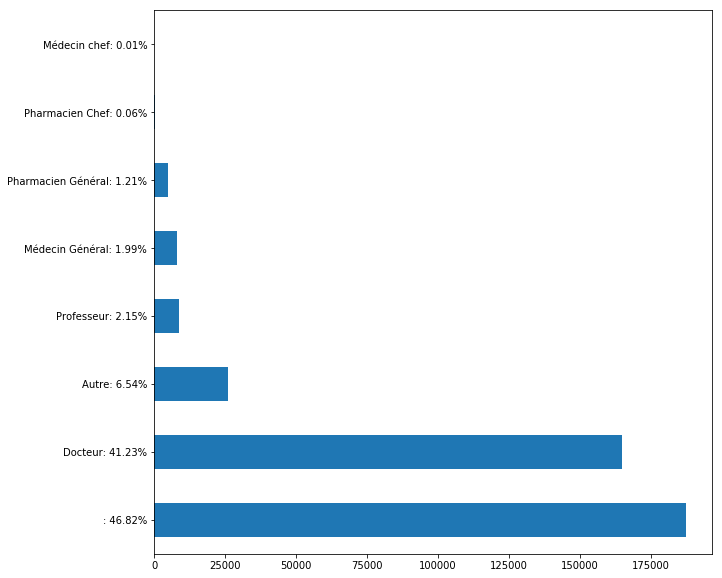

In [62]:
data_count = avantages_data_train["benef_titre_libelle"].value_counts()
#Rename index to add percentage
new_index = [k+ ": %.2f%%" %(v*100/N_train) for k,v in data_count.iteritems()]
data_count.index = new_index
figure = plt.figure(figsize= (10,10))
ax = figure.add_subplot(1,1,1)
data_count.plot.barh(logx = False)
plt.show()

In [64]:
print("Le nombre moyen de mots dans le libellé du titre du bénéficiaire est de : ", get_num_words_per_sample(avantages_data_train["benef_titre_libelle"]))

Le nombre moyen de mots dans le libellé du titre du bénéficiaire est de :  1.0


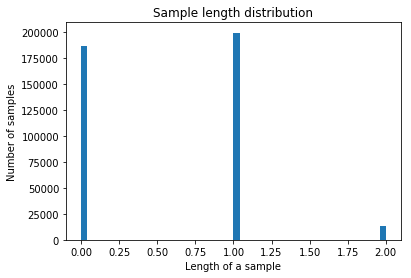

In [65]:
plot_sample_length_distribution(avantages_data_train["benef_titre_libelle"])

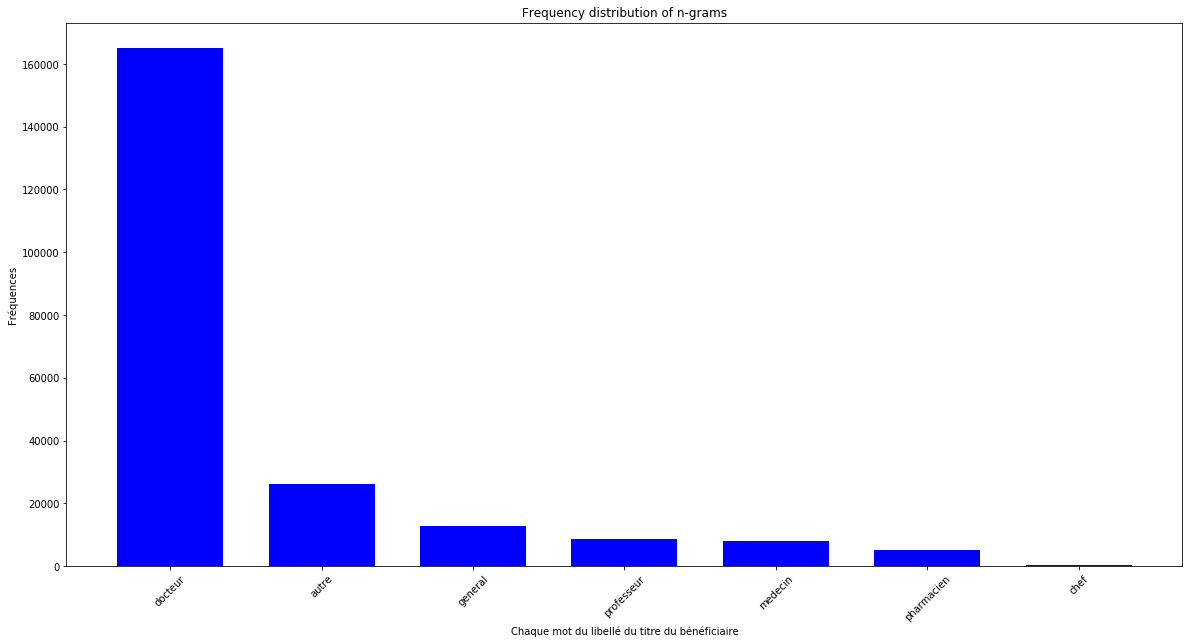

In [66]:
plot_frequency_distribution_of_ngrams(avantages_data_train["benef_titre_libelle"])

## Apprentissage de la qualité en fonction du libellé du titre du bénéficiaire

In [67]:
x_train, x_val = ngram_vectorize(avantages_data_train["benef_titre_libelle"], avantages_data_train["qualite"], avantages_data_valid["benef_titre_libelle"])

y_train = avantages_data_train["qualite"]
y_test = avantages_data_valid["qualite"]

### Bagging

In [68]:
bag_clf.fit(x_train, y_train)
predicted = bag_clf.predict(x_val)

print("L'accuracy est égal à : ", metrics.accuracy_score(y_test, predicted))

print(metrics.classification_report(y_test, predicted))

L'accuracy est égal à :  0.76492
                                                                         precision    recall  f1-score   support

                                                                              0.00      0.00      0.00      6746
                                                          Aide soignant       0.00      0.00      0.00       367
                                                            Ambulancier       0.00      0.00      0.00         1
                                                     Assistant dentaire       0.00      0.00      0.00         2
                                                       Audioprothésiste       0.00      0.00      0.00       426
                                             Auxiliaire de puériculture       0.00      0.00      0.00        55
                                                    Chirurgien-dentiste       0.00      0.00      0.00      2446
                                                            Di

L'accuracy nous indique que notre modèle donne environ 76% de bonnes prédictions

### Random Forest

In [69]:
RandFores_clf.fit(x_train, y_train)
predicted = RandFores_clf.predict(x_val)

print("L'accuracy est égal à : ", metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

L'accuracy est égal à :  0.51977
                                                                         precision    recall  f1-score   support

                                                                              0.14      0.99      0.25      6746
                                                          Aide soignant       0.00      0.00      0.00       367
                                                            Ambulancier       0.00      0.00      0.00         1
                                                     Assistant dentaire       0.00      0.00      0.00         2
                                                       Audioprothésiste       0.00      0.00      0.00       426
                                             Auxiliaire de puériculture       0.00      0.00      0.00        55
                                                    Chirurgien-dentiste       0.00      0.00      0.00      2446
                                                            Di

L'accuracy nous indique que notre modèle donne environ 52% de bonnes prédictions.

On remarque que la méthode de Random Forest donne de moins bons résultats que le Bagging.

## Apprentissage du type de l'identifiant en fonction de la catégorie

In [70]:
x_train,x_val = ngram_vectorize(avantages_data_train["categorie"], avantages_data_train["identifiant_type"], avantages_data_valid["categorie"])

y_train = avantages_data_train["identifiant_type"]
y_test = avantages_data_valid["identifiant_type"]

### Bagging

In [72]:
bag_clf.fit(x_train, y_train)
predicted = bag_clf.predict(x_val)

print("L'accuracy est égal à : ", metrics.accuracy_score(y_test, predicted))

print(metrics.classification_report(y_test, predicted))

L'accuracy est égal à :  0.78585
              precision    recall  f1-score   support

       AUTRE       0.98      0.24      0.38     26699
      FINESS       0.00      0.00      0.00         5
       ORDRE       1.00      0.15      0.27      1082
        RPPS       0.77      1.00      0.87     72089
       SIREN       0.57      0.52      0.54       125

   micro avg       0.79      0.79      0.79    100000
   macro avg       0.66      0.38      0.41    100000
weighted avg       0.83      0.79      0.73    100000



L'accuracy nous indique que notre modèle donne environ 79% de bonnes prédictions.

### Random Forest

In [73]:
RandFores_clf.fit(x_train, y_train)
predicted = RandFores_clf.predict(x_val)

print("L'accuracy est égal à : ", metrics.accuracy_score(y_test, predicted))
L'accuracy nous indique que notre modèle donne environ 79% de bonnes prédictions.
print(metrics.classification_report(y_test, predicted))

L'accuracy est égal à :  0.78268
              precision    recall  f1-score   support

       AUTRE       0.99      0.22      0.37     26699
      FINESS       0.03      0.60      0.05         5
       ORDRE       1.00      0.15      0.27      1082
        RPPS       0.77      1.00      0.87     72089
       SIREN       0.22      0.74      0.34       125

   micro avg       0.78      0.78      0.78    100000
   macro avg       0.60      0.54      0.38    100000
weighted avg       0.83      0.78      0.73    100000



L'accuracy nous indique que notre modèle donne environ 78% de bonnes prédictions.

On remarque que les méthodes de Random Forest et de Bagging donne à peu près les mêmes résultats en terme d'accuracy.

***

### <span style="color:blue">Analyse<span>

In [104]:
avantages_data.shape

(500000, 36)

### Catégorie

##### Nombre d'occurences par catégorie

In [107]:
avantages_data.ix[:, "categorie"].value_counts()

Professionnel de santÃ©                                                                      466248
Etudiant                                                                                      30297
Association professionnel de santÃ©                                                            1072
VÃ©tÃ©rinaire                                                                                   831
Etablissement de santÃ©                                                                         525
Personnes morales assurant la formation initiale ou continue des professionnels de santÃ©       459
AcadÃ©mies, Fondation, sociÃ©tÃ©s savantes, organismes de conseils                              287
Association usager de santÃ©                                                                    174
Presse et mÃ©dia                                                                                103
Association d'Ã©tudiants                                                                          2


### Dénomination sociale

##### Nombre d'occurences par dénomination sociale

In [109]:
avantages_data.ix[:, "denomination_sociale"].value_counts()

ASTRAZENECA                                    55914
NOVARTIS PHARMA SAS                            31781
ICOMED                                         24986
ROCHE SAS                                      16266
MEDTRONIC France S.A.S                         15276
MSD France                                     15043
ALLERGAN FRANCE                                14497
ASTELLAS PHARMA                                14444
LUNDBECK SAS                                   13772
AbbVie                                         13701
GILEAD SCIENCES                                 9181
BOEHRINGER INGELHEIM FRANCE                     8266
LABORATOIRES BOUCHARA - RECORDATI               7758
Otsuka Pharmaceutical France SAS                7716
JANSSEN-CILAG                                   7590
TEVA SANTE SAS                                  7468
NOVO NORDISK                                    7443
PFIZER SAS                                      7426
GUERBET France                                

##### Mots revenant le plus de fois (dénomination sociale)

In [216]:
CV_denomination_sociale_avantage = CountVectorizer(max_features=300)
CV_denomination_sociale_avantage.fit(avantages_data.loc[:, 'denomination_sociale'].values)
bag_of_words_denomination_sociale_avantage = CV_denomination_sociale_avantage.transform(avantages_data.loc[:, 'denomination_sociale'].values)

In [217]:
# Tous les mots existants
CV_denomination_sociale_avantage.vocabulary_

{'abbvie': 4,
 'guerbet': 129,
 'france': 109,
 'laboratoires': 161,
 'urgo': 287,
 'novartis': 198,
 'pharma': 219,
 'sas': 244,
 'sos': 261,
 'oxygene': 209,
 'toshiba': 284,
 'medical': 181,
 'zimmer': 297,
 'iprad': 150,
 'braun': 55,
 'astrazeneca': 31,
 'grünenthal': 128,
 'abbott': 3,
 'groupe': 127,
 'sa': 236,
 'vascutek': 288,
 'thuasne': 280,
 'gibaud': 117,
 'convatec': 74,
 'sigvaris': 254,
 'medtronic': 185,
 'allergan': 16,
 'therabel': 278,
 'lucien': 174,
 'bouchara': 53,
 'recordati': 231,
 'sorin': 260,
 'group': 126,
 'alexion': 13,
 'isis': 152,
 'laboratoire': 160,
 'glaxosmithkline': 120,
 'lundbeck': 175,
 'ethicon': 97,
 'cosmetique': 77,
 'active': 8,
 'pierre': 223,
 'olympus': 201,
 'the': 276,
 'amgen': 19,
 'fabre': 105,
 'medicament': 182,
 'gmbh': 122,
 'bayer': 40,
 'sante': 240,
 'ltd': 173,
 'paul': 214,
 'hartmann': 130,
 'sarl': 243,
 'médical': 193,
 'roche': 234,
 'sanofi': 239,
 'aventis': 35,
 'ortho': 203,
 'msd': 190,
 'teva': 275,
 'dom': 91,

In [218]:
# Tous les mots existants
CV_denomination_sociale_avantage.get_feature_names()

['3i',
 '3m',
 '506',
 'abbott',
 'abbvie',
 'abelló',
 'actelion',
 'actions',
 'active',
 'ag',
 'agency',
 'aguettant',
 'alcon',
 'alexion',
 'alfa',
 'alk',
 'allergan',
 'alliance',
 'american',
 'amgen',
 'amo',
 'amplifon',
 'anthogyr',
 'aptalis',
 'ariad',
 'arkopharma',
 'arrow',
 'arthrex',
 'aspen',
 'associes',
 'astellas',
 'astrazeneca',
 'atlantique',
 'ato',
 'audionova',
 'aventis',
 'avitum',
 'b3tsi',
 'bard',
 'bausch',
 'bayer',
 'behring',
 'besins',
 'biocare',
 'biocodex',
 'biogen',
 'biomarin',
 'biomet',
 'biosensors',
 'biotronik',
 'boehringer',
 'boiron',
 'boston',
 'bouchara',
 'bracco',
 'braun',
 'bristol',
 'bsn',
 'by',
 'cardim',
 'cardinal',
 'care',
 'carl',
 'celgene',
 'chauvin',
 'chemedica',
 'chiesi',
 'chirurgie',
 'cilag',
 'clinical',
 'co',
 'cochlear',
 'colloques',
 'congres',
 'convatec',
 'conventions',
 'cordis',
 'cosmetique',
 'covidien',
 'cristalens',
 'csl',
 'daiichi',
 'de',
 'dental',
 'dentsply',
 'depuy',
 'des',
 'diabet

In [219]:
sum_words_denomination_sociale_avantage = bag_of_words_denomination_sociale_avantage.sum(axis=0) 
words_freq_denomination_sociale_avantage = [(word_denomination_sociale_avantage, sum_words_denomination_sociale_avantage[0, idx_denomination_sociale_avantage]) for word_denomination_sociale_avantage, idx_denomination_sociale_avantage in CV_denomination_sociale_avantage.vocabulary_.items()]

In [220]:
sorted(words_freq_denomination_sociale_avantage, key = lambda x: x[1], reverse = True)

[('france', 141501),
 ('sas', 137246),
 ('pharma', 68491),
 ('astrazeneca', 55914),
 ('novartis', 32004),
 ('laboratoires', 30705),
 ('icomed', 24986),
 ('roche', 17400),
 ('msd', 17355),
 ('medtronic', 15276),
 ('allergan', 14497),
 ('astellas', 14449),
 ('lundbeck', 13772),
 ('abbvie', 13701),
 ('medical', 12133),
 ('gilead', 9181),
 ('sciences', 9181),
 ('sante', 9053),
 ('pfizer', 8827),
 ('boehringer', 8266),
 ('ingelheim', 8266),
 ('bouchara', 7758),
 ('recordati', 7758),
 ('otsuka', 7716),
 ('pharmaceutical', 7716),
 ('janssen', 7590),
 ('cilag', 7590),
 ('teva', 7468),
 ('novo', 7443),
 ('nordisk', 7443),
 ('healthcare', 6995),
 ('guerbet', 6815),
 ('abbott', 6774),
 ('boiron', 6689),
 ('sa', 6603),
 ('lilly', 5725),
 ('st', 5565),
 ('jude', 5561),
 ('takeda', 5547),
 ('fresenius', 5438),
 ('bayer', 5152),
 ('menarini', 5138),
 ('grünenthal', 5066),
 ('laboratoire', 4604),
 ('sandoz', 4436),
 ('sanofi', 4149),
 ('ucb', 3844),
 ('merck', 3501),
 ('care', 3487),
 ('meda', 3481),


On remarque que les mots revenant le plus souvent dans la dénomination sociale sont : france, saas et pharma.

### Qualité

##### Nombre d'occurences par qualité

In [222]:
avantages_data.ix[:, "qualite"].value_counts()

Médecin                                                                    364347
Infirmier                                                                   39013
Pharmacien                                                                  23873
Chirurgien-dentiste                                                         11980
Préparateur en pharmacie et préparateur en pharmacie hospitalière           10872
Manipulateur d’électroradiologie médicale                                    5458
Audioprothésiste                                                             2076
Aide soignant                                                                1726
Opticien-lunetier                                                            1279
Technicien de laboratoire médical                                            1240
Sage-femme                                                                   1230
Masseur-kinésithérapeute                                                      944
Diététicien     

### Ville du bénéficiaire

##### Nombre d'occurences par la ville du bénéficiare

In [223]:
avantages_data.ix[:, "benef_ville"].value_counts()

PARIS                         13906
MARSEILLE                      8064
TOULOUSE                       4191
NICE                           3634
LILLE CEDEX                    3458
MONTPELLIER CEDEX 5            3387
BORDEAUX                       3378
LYON                           3244
MONTPELLIER                    3091
BORDEAUX CEDEX                 3016
TOULOUSE CEDEX 9               2913
CRETEIL CEDEX                  2781
LILLE                          2692
PARIS CEDEX 13                 2681
STRASBOURG                     2649
LA TRONCHE                     2341
BESANCON CEDEX                 2276
MARSEILLE CEDEX 05             2270
DIJON CEDEX                    2228
PARIS CEDEX 10                 2167
PARIS CEDEX 14                 2124
ROUEN CEDEX                    2084
PARIS CEDEX 15                 2057
NANTES                         2045
STRASBOURG CEDEX               1962
CLERMONT FERRAND CEDEX 1       1929
LIMOGES CEDEX 1                1835
REIMS CEDEX                 

### Pays du bénéficiaire

##### Nombre d'occurences par le pays du bénéficiare

In [224]:
avantages_data.ix[:, "pays"].value_counts()

FRANCE                                  466719
RÉUNION                                   1634
MARTINIQUE                                 851
GUADELOUPE                                 723
GUYANE FRANÇAISE                           129
NOUVELLE-CALÉDONIE                         101
GUYANA                                      91
MONACO                                      53
MAYOTTE                                     52
ALGÉRIE                                     47
POLYNÉSIE FRANÇAISE                         37
MAROC                                       30
BELGIQUE                                    28
ÉTATS-UNIS                                  15
SUISSE                                      14
TUNISIE                                     13
ESPAGNE                                     11
CÔTE D'IVOIRE                                8
AFGHANISTAN                                  7
SÉNÉGAL                                      5
SAINT-PIERRE-ET-MIQUELON                     4
MAURITANIE   

### Libellé du titre du bénéficiaire

##### Nombre d'occurences par le libellé du titre du bénéficiare

In [221]:
avantages_data.ix[:, "benef_titre_libelle"].value_counts()

Docteur               206174
Autre                  32691
Professeur             10702
Médecin Général         9928
Pharmacien Général      6036
Pharmacien Chef          290
Médecin chef              54
Name: benef_titre_libelle, dtype: int64

### Libellé de la spécialité du bénéficiaire

##### Nombre d'occurences par le libellé de la spécialité du bénéficiare

In [225]:
avantages_data.ix[:, "benef_speicalite_libelle"].value_counts()

Autre                                                  52512
Médecine Générale                                      52284
Cardiologie et maladies vasculaires                    26129
Ophtalmologie                                          17275
Pneumologie                                            10112
Gastro-entérologie et hépatologie                       8066
Rhumatologie                                            7926
Endocrinologie et métabolisme                           7840
Neurologie                                              7777
Psychiatrie                                             6165
Dermatologie et vénéréologie                            6146
Oncologie option médicale                               5057
Gynécologie médicale                                    4829
Pédiatrie                                               4450
Hématologie                                             4400
Chirurgie orthopédique et traumatologie                 4300
Médecine interne        

##### Mots revenant le plus de fois (libellé de la spécialité du bénéficiaire)

In [229]:
avantages_data_specialite = avantages_data.loc[:, 'benef_speicalite_libelle'][avantages_data.loc[:, 'benef_speicalite_libelle'].notna()]

In [231]:
CV_specialite_avantage = CountVectorizer(max_features=300)
CV_specialite_avantage.fit(avantages_data_specialite.values)
bag_of_words_specialite_avantage  = CV_specialite_avantage.transform(avantages_data_specialite.values)

In [232]:
# Tous les mots existants
CV_specialite_avantage.vocabulary_

{'médecine': 39,
 'générale': 27,
 'endocrinologie': 18,
 'et': 22,
 'métabolisme': 41,
 'autre': 3,
 'chirurgie': 9,
 'orthopédique': 54,
 'traumatologie': 81,
 'pneumologie': 61,
 'oncologie': 48,
 'option': 50,
 'médicale': 40,
 'cardiologie': 7,
 'maladies': 37,
 'vasculaires': 85,
 'radio': 66,
 'diagnostic': 14,
 'neuro': 42,
 'interne': 34,
 'gynéco': 25,
 'obstétrique': 46,
 'gynécologie': 26,
 'gastro': 24,
 'entérologie': 20,
 'hépatologie': 32,
 'orthopédie': 53,
 'dento': 12,
 'faciale': 23,
 'cervico': 8,
 'vasculaire': 84,
 'neurologie': 43,
 'thérapie': 80,
 'rhumatologie': 71,
 'thoracique': 79,
 'cardio': 6,
 'ophtalmologie': 49,
 'dermatologie': 13,
 'vénéréologie': 87,
 'pédiatrie': 64,
 'physique': 59,
 'réadaptation': 72,
 'plastique': 60,
 'reconstructrice': 69,
 'esthétique': 21,
 'maxillo': 38,
 'gériatrie': 29,
 'néphrologie': 45,
 'anesthesie': 2,
 'réanimation': 73,
 'qualifié': 65,
 'en': 17,
 'spécialiste': 77,
 'urologique': 83,
 'biologie': 4,
 'hématolog

In [233]:
# Tous les mots existants
CV_specialite_avantage.get_feature_names()

['adolescent',
 'anatomie',
 'anesthesie',
 'autre',
 'biologie',
 'bucco',
 'cardio',
 'cardiologie',
 'cervico',
 'chirurgie',
 'cytologie',
 'dentaire',
 'dento',
 'dermatologie',
 'diagnostic',
 'digestive',
 'du',
 'en',
 'endocrinologie',
 'enfant',
 'entérologie',
 'esthétique',
 'et',
 'faciale',
 'gastro',
 'gynéco',
 'gynécologie',
 'générale',
 'génétique',
 'gériatrie',
 'hygiène',
 'hématologie',
 'hépatologie',
 'infantile',
 'interne',
 'laryngologie',
 'maladie',
 'maladies',
 'maxillo',
 'médecine',
 'médicale',
 'métabolisme',
 'neuro',
 'neurologie',
 'nucléaire',
 'néphrologie',
 'obstétrique',
 'onco',
 'oncologie',
 'ophtalmologie',
 'option',
 'orale',
 'orl',
 'orthopédie',
 'orthopédique',
 'oto',
 'pathologiques',
 'pharmacie',
 'pharmacovigilance',
 'physique',
 'plastique',
 'pneumologie',
 'psychiatrie',
 'publique',
 'pédiatrie',
 'qualifié',
 'radio',
 'radiothérapie',
 'recherche',
 'reconstructrice',
 'rhino',
 'rhumatologie',
 'réadaptation',
 'réanima

In [234]:
sum_words_specialite_avantage = bag_of_words_specialite_avantage.sum(axis=0) 
words_freq_specialite_avantage = [(word_specialite_avantage, sum_words_specialite_avantage[0, idx_specialite_avantage]) for word_specialite_avantage, idx_specialite_avantage in CV_specialite_avantage.vocabulary_.items()]

In [235]:
sorted(words_freq_specialite_avantage, key = lambda x: x[1], reverse = True)

[('médecine', 65745),
 ('et', 62761),
 ('générale', 59612),
 ('autre', 52512),
 ('cardiologie', 26129),
 ('maladies', 26129),
 ('vasculaires', 26129),
 ('chirurgie', 21350),
 ('ophtalmologie', 17344),
 ('médicale', 11970),
 ('pneumologie', 10112),
 ('gastro', 8066),
 ('entérologie', 8066),
 ('hépatologie', 8066),
 ('rhumatologie', 7926),
 ('endocrinologie', 7840),
 ('métabolisme', 7840),
 ('neurologie', 7777),
 ('option', 6814),
 ('psychiatrie', 6328),
 ('oncologie', 6179),
 ('dermatologie', 6146),
 ('vénéréologie', 6146),
 ('gynécologie', 5915),
 ('hématologie', 5561),
 ('radio', 4917),
 ('en', 4856),
 ('pédiatrie', 4450),
 ('orthopédique', 4300),
 ('traumatologie', 4300),
 ('réanimation', 3926),
 ('interne', 3925),
 ('qualifié', 3648),
 ('néphrologie', 3614),
 ('urologique', 3576),
 ('anesthesie', 3505),
 ('vasculaire', 3423),
 ('diagnostic', 2888),
 ('du', 2202),
 ('travail', 2087),
 ('thérapie', 2018),
 ('oto', 1961),
 ('rhino', 1961),
 ('laryngologie', 1961),
 ('viscérale', 1911),

On remarque que les mots pertinents revenant le plus souvent dans le libellé de la spécialité du bénéficiaire sont : médecine, cardiologie et vasculaires.

### Montant TTC de l'avantage

##### Nombre d'occurences par le montant TTC de l'avantage

In [236]:
avantages_data.ix[:, "avant_montant_ttc"].value_counts()

57       38490
60       35098
20       21567
25       15323
55       13614
50       13225
30       12910
19       11644
43       11212
18       10709
23       10695
29        9992
15        9791
22        9329
17        9069
21        8981
16        8481
10        8108
24        8027
40        7882
14        7634
13        7369
45        7096
28        7077
11        7055
26        6632
31        6249
34        6120
27        5944
35        5806
         ...  
1867         1
2213         1
4430         1
1699         1
4769         1
3149         1
2210         1
9800         1
1612         1
18500        1
1954         1
4937         1
2724         1
4775         1
2123         1
7332         1
2214         1
1097         1
4007         1
5796         1
1446         1
934          1
1866         1
5028         1
6821         1
4936         1
2215         1
1445         1
17581        1
16392        1
Name: avant_montant_ttc, Length: 2833, dtype: int64

---

## <span style="color:red"> Analyse du jeu de données entreprises <span>

In [237]:
entreprises_data.shape

(3315, 12)

### Pays de l'entreprise

##### Nombre d'occurences par pays

In [238]:
entreprises_data.ix[:, "pays"].value_counts()

FRANCE                                         2420
ÉTATS-UNIS                                      199
ROYAUME-UNI                                     115
ALLEMAGNE                                        84
SUISSE                                           77
BELGIQUE                                         49
IRLANDE                                          28
PAYS-BAS                                         25
ESPAGNE                                          24
ITALIE                                           24
SUÈDE                                            22
RÉUNION                                          17
JAPON                                            15
AUTRICHE                                         11
ISRAËL                                           11
DANEMARK                                         10
CANADA                                           10
MONACO                                            9
ÉMIRATS ARABES UNIS                               8
MARTINIQUE  

### Secteur de l'entreprise

##### Nombre d'occurences par secteur

In [239]:
entreprises_data.ix[:, "secteur"].value_counts()

Dispositifs médicaux                           1414
Médicaments humains                             784
Prestataires associés                           448
Autres                                          440
Dispositifs médicaux de diagnostic in vitro     115
Produits cosmétiques                             80
Médicament vétérinaire                           34
Name: secteur, dtype: int64

### Ville de l'entreprise

##### Nombre d'occurences par ville

In [240]:
entreprises_data.ix[:, "ville"].value_counts()

PARIS                       182
Paris                       173
LYON                         34
London                       27
BOULOGNE BILLANCOURT         17
Lyon                         17
Boulogne Billancourt         15
Boulogne-Billancourt         13
PUTEAUX                      12
COURBEVOIE                   12
San Diego                    12
Marseille                    11
Dublin                       11
Londres                      11
NANTERRE                     10
Cambridge                    10
paris                        10
Suresnes                     10
RENNES                       10
ISSY LES MOULINEAUX          10
NEUILLY SUR SEINE             9
LEVALLOIS PERRET              9
MARSEILLE                     9
MONACO                        9
MONTPELLIER                   9
Strasbourg                    8
Neuilly sur Seine             8
RUEIL MALMAISON               8
ANTONY                        8
Rueil-Malmaison               8
                           ... 
CLAMART 

##### Villes que l'on peut réunir ensemble

In [303]:
#import unicodedata
 
#def majuscsa(chaine):
 #   """Convertit la chaine (unicode), en majuscules non accentuées
  #  """
   # # convertit en majuscule avec conservation des accents éventuels
    #chaine = chaine.upper()
    # supprime les accents éventuels qui restent
    #chnorm = unicodedata.normalize('NFKD', chaine)
    #return "".join([car for car in chnorm if not unicodedata.combining(car)])

In [304]:
#from difflib import SequenceMatcher
 
#def simil(mot1, mot2, ratio, okmajusc=True):
 #   """compare les 2 mots, et retourne True si le tx de similitude >= ratio
  #     si okmajusc=True, la comparaison est faite en majuscule sans accent
   # """
    #if okmajusc:
     #   mot1, mot2 = majuscsa(mot1), majuscsa(mot2)
    #return SequenceMatcher(None, mot1, mot2).ratio() >= ratio

In [305]:
#for i in range(len(entreprises_data.ix[:, "ville"].values)-1):
 #   print(simil(entreprises_data.ix[:, "ville"].values[i], entreprises_data.ix[:, "ville"].values[i+1], 0.5))

In [265]:
list(set(entreprises_data.ix[:, "ville"].values))

'Voisins Le Bretonneux'

In [274]:
liste_mots =list(set(entreprises_data.ix[:, "ville"].values))

In [302]:
list_villes_similaires = []

for i in range(len(liste_mots)):
    ratio = 0.7
    resultat = [mot for mot in liste_mots if SequenceMatcher(None, liste_mots[i], mot).ratio() >= ratio]
    if resultat not in list_villes_similaires:
        list_villes_similaires.append(resultat)
    
print(list_villes_similaires)

[['Voisins Le Bretonneux', 'Montigny Le Bretonneux', 'Voisins les Bretonneux', 'Montigny le Bretoneux', 'Voisins le Bretonneux'], ['NOGENT SUR OISE'], ['CHANTILLY', 'GENTILLY', 'CHATILLON'], ['Mulhouse', 'toulouse', 'Toulouse'], ['Magny le Desert'], ['Evron'], ['OXFORDSHIRE'], ['Orvault', 'Orgeval'], ['MILAN', 'MEYLAN', 'MILANO'], ['PARIS LA DEFENSE', 'PARIS LA DEFENSE CEDEX', 'LA DEFENSE', 'LA DEFENSE ', 'LADEFENSE'], ['Welwyn Garden City, Hertfordshire'], ['SAINT MAURICE SUR EYGUES', 'SAINT MICHEL SUR MEURTHE'], ['gennevilliers', 'Gennevilliers'], ['AMOU'], ['VAUX-LE-PÉNIL'], ['Peronnas', 'Péronnas', 'Verona'], ['Lauzerville', 'Maxeville'], ['MELUN CEDEX', 'MEYZIEU CEDEX', 'GENAY CEDEX'], ['NOISIEL'], ['Briennon'], ['Dublin  ', 'Dublin 4', 'Dublin 2', 'Dublin', 'Dublin 9', 'Dublin '], ['Tuttligen', 'Tuttlingen'], ['OLEMPS', 'LEMPDES'], ['Bourguebus'], ['TOULOUSE CEDEX 1', 'TOULON CEDEX'], ['Houston', 'Boston'], ['Yokneam '], ['BOULOGNE BILLANCOURT', 'BOULOGNE-BILLANCOURT', 'BOULOGNE 

Nous avons essayé de réunir ensemble les villes se ressemblant afin de réunir les mêmes villes mais écrites différemment suite à une faute de frappe ou d'une mauvaise écriture. Cependant, nous avons remarqué qu'il y a certaines villes qui sont totalement différentes et qui sont réunies ensemble. Nous n'avons alors pas mis en place ce traitement là pour la partie ETL.

---

## <span style="color:red">Natural Language Processing <span>